# Unlocking the Charts: The hidden secrets from hits
- The purpose of this capstone is to determine what makes a song popular on Spotify and, more importantly, to create actionable insights that artists and producers can use to maximize their listenership and make their music more successful. As the number of tracks in the world doubles every 12 months, knowing why a song might appeal to a larger audience has become crucial for success in an industry where competition is high and discoverability can be a real challenge. 
- The project deals with a real-world problem, which is of interest to many aspiring and established musicians. The problem is like this: how do you cut the noise and get your music to be heard? Through data analysis and existing literature, this project will aim to present more prescriptive conclusions that inform artists on how to successfully operate within the digital music ecosystem and improve their likelihood of being discovered by a wider audience.

 ---


# 📶 Access the Interactive Dashboard

Explore the interactive dashboard for this dataset and view reviews connected directly with the Spotify API:

# 👉 [Spotify Hit Science Dashboard](https://spotifyhitscience.streamlit.app/) 🔴🔴🔴

For code details and implementation, visit the GitHub repository linked on the dashboard.

**GitHub Repository:** [https://github.com/LuiisClaudio/spotify_capstone](https://github.com/LuiisClaudio/spotify_capstone)

--- 

## Data Description

This notebook uses the [Spotify Tracks: Attributes and Popularity] dataset. The dataset contains detailed information about over 113,000 Spotify tracks, including both musical attributes and popularity metrics.

### Key Features in the Dataset:
- **track_artist**: Name of the artist(s) performing the track.
- **album_name**: Name of the album the track belongs to.
- **track_name**: Title of the track.
- **track_popularity**: Popularity score of the track (0-100), as determined by Spotify.
- **duration_ms**: Duration of the track in milliseconds.
- **explicit**: Boolean indicating if the track contains explicit content.
- **danceability, energy, valence, loudness, acousticness, instrumentalness, liveness, speechiness**: Audio features extracted by Spotify, describing the musical and sonic characteristics of each track.
- **key, mode, tempo, time_signature**: Musical properties such as key, mode (major/minor), tempo (BPM), and time signature.
- **track_genre**: Genre classification for the track.

### How the Dataset is Used in This Notebook:
- **Data Cleaning & Preprocessing**: The notebook removes missing values, handles duplicates, and drops irrelevant columns to ensure data quality.
- **Feature Engineering**: Musical features are scaled and transformed for analysis and modeling.
- **Exploratory Data Analysis (EDA)**: The notebook explores relationships between musical attributes and popularity, trends across genres and subgenres, and artist performance.
- **Statistical Analysis**: Normality tests, outlier detection, and statistical tests (parametric and non-parametric) are performed to understand feature distributions and group differences.
- **Modeling**: Machine learning models (classification and regression) are trained to predict track popularity and analyze feature importance.
- **Insights & Recommendations**: The analysis provides actionable insights for artists and producers on how musical characteristics influence popularity and how to optimize for success on Spotify.

This comprehensive approach leverages the dataset to uncover patterns in music popularity and guide strategic decisions in music production and marketing.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

In [112]:
df = pd.read_csv("dataset/dataset_spotify.csv")

In [113]:
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [114]:
df.rename(columns={'popularity': 'track_popularity'}, inplace=True)
df.rename(columns={'artists': 'track_artist'}, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   track_artist      113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   track_popularity  114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [116]:
df.describe()

,index,track_popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [117]:
df.isnull().sum()

index               0
track_id            0
track_artist        1
album_name          1
track_name          1
track_popularity    0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [118]:
df = df.dropna()
df.isnull().sum()

index               0
track_id            0
track_artist        0
album_name          0
track_name          0
track_popularity    0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [119]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Length: 113999, dtype: bool

In [120]:
df.duplicated().sum()

0

In [121]:
df = df.drop_duplicates()
df.head()

,index,track_id,track_artist,album_name,track_name,track_popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Remove feature not relevant for the analysis

In [122]:
# Dropping columns with no values for the analysis
no_values_columns = ['track_id']
df.drop(columns=no_values_columns, inplace=True)

In [123]:
# Check the shape of the combined dataset
print(f'Total records: {df.shape[0]}')
print(f'Total features: {df.shape[1]}')

Total records: 113999
Total features: 20


In [124]:
# Calculate the percentage of missing values
print(df.isnull().sum())
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent = pd.DataFrame({'Missing Percentage': missing_percent})
missing_percent

index               0
track_artist        0
album_name          0
track_name          0
track_popularity    0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


,Missing Percentage


In [125]:
df.dtypes

index                 int64
track_artist         object
album_name           object
track_name           object
track_popularity      int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [126]:
df.describe()

,index,track_popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Mode and Key:

## Key:
- Focuses on the tonal center and overall harmonic structure.
- Often defined by a key signature.
- Can be seeing as category data
## Mode:
- Focuses on the specific arrangement of intervals within a scale.
- Creates different melodic and harmonic flavors.
- Can be seeing as category data
## Tempo:

- Definition: Tempo is the speed or pace of a piece of music.   
- It's typically measured in beats per minute (BPM).
- Can be seeing as float data

## Time signatures
- Provide the rhythmic framework for a piece of music, dictating how the beats are organized within each measure.
- Can be seeing as integer data



In [127]:
# Convert 'key' and 'mode' to categorical
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df.time_signature = df.time_signature.astype(int) 

df.dtypes

index                  int64
track_artist          object
album_name            object
track_name            object
track_popularity       int64
duration_ms            int64
explicit                bool
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature         int32
track_genre           object
dtype: object

In [128]:
#Derivated columns from the dataset with scale features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[features].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,0.566801,0.641383,-8.258950,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695
std,0.173543,0.251530,5.029357,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500
50%,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,0.695000,0.854000,-5.003000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000
max,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


# Feature Scaling Process

## Key Operations
- **Feature Selection**: Identifies key musical attributes for scaling  
    *Why?* To focus on features most relevant for modeling and analysis, ensuring only meaningful variables are normalized.
- **Name Creation**: Generates new column names with 'scaled_' prefix  
    *Why?* To clearly distinguish between original and scaled features, preserving both for reference and interpretability.
- **Transform**: Applies MinMaxScaler to normalize values between 0 and 1  
    *Why?* To bring all selected features onto the same scale, which is essential for fair comparison and optimal model performance.

## Purpose
- **Normalization**: Brings all features to same scale (0-1)
- **Comparison**: Enables fair comparison between different features
- **Model Performance**: Improves machine learning model performance
- **Feature Preservation**: Keeps original features while adding scaled versions

## Benefits
- **Equal Feature Weight**: Prevents features with larger ranges from dominating
- **Model Stability**: Helps with gradient descent convergence
- **Interpretability**: Makes feature comparisons more intuitive
- **Original Data**: Maintains original values for reference

This scaling step is crucial for preparing the data for machine learning models while preserving the original features for analysis.

In [129]:
from sklearn.preprocessing import MinMaxScaler

# Create derived columns for scaled features

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features and add them as new columns
scaled_features = ['scaled_' + feature for feature in features]
df[scaled_features] = scaler.fit_transform(df[features])

# Display the first few rows to verify the scaled columns
df[scaled_features].head()

,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,0.686294,0.4610,0.791392,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245
1,0.426396,0.1660,0.597377,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397
2,0.444670,0.3590,0.736123,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643
3,0.270051,0.0596,0.573701,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758
4,0.627411,0.4430,0.737103,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863


---
# Spotify Capstone Project

## Proposal:

- Phe problem: How to help artists and producers increase the popularity of their songs.

## Analysis Questions and Insights:

### Music Characteristics and Popularity:
- Which musical characteristics (tempo, mode, duration, etc.) are most associated with a song's popularity?
- Are there patterns or trends in the structure of the most popular songs?
- How do a song's energy, danceability, and sonic qualities relate to its popularity?
### Artists and Trends:
- Which artists have the highest number of popular songs, and what characteristics differentiate them?
- How does an artist's popularity affect the performance of their songs?
- Are there genre or style trends that are rising or declining?
- How does the length of an artist's career influence their popularity?
### Genre Analysis:
- How do the musical characteristics that lead to popularity vary across different genres?
- Are there specific genres where certain musical features are more important for achieving popularity?
- How does the subgenre affect the songs popularity?

## Detailed Analysis of Features and Questions:

## Musical Characteristics and Popularity (In-Depth):
### Energy, Danceability, Valence, Loudness:
- How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?
- Are there specific thresholds for these features that maximize popularity?
### Tempo, Duration_ms, Time_signature:
- What is the ideal tempo for successful songs in each genre? 
- Does song duration have a significant impact on popularity?
- How does the time signature (time_signature) affect danceability and popularity?
### Acousticness, Instrumentalness, Speechiness, Liveness:
- How does the presence of acoustic, instrumental, spoken word, and live recording elements correlate with popularity?
- Are there genres in which instrumentalization is more popular?
### Mode, Key:
- Which musical modes and keys are most popular in different genres?
- Is there a preference for songs in major or minor modes?

--- 
# EDA

#### How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?

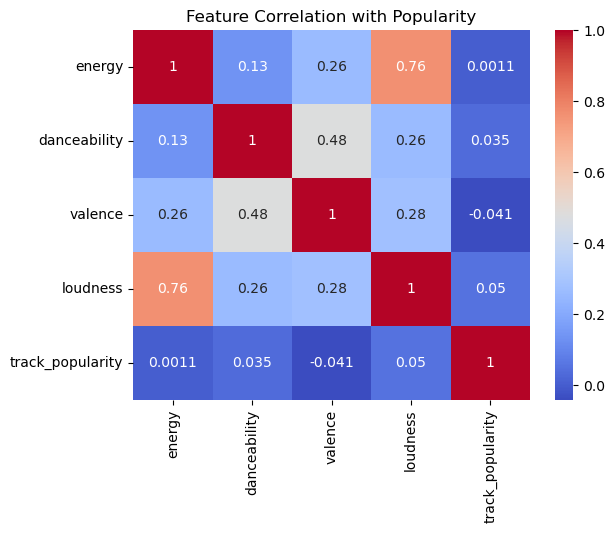

energy: 0.24
danceability: 0.24
valence: 0.24
loudness: 0.27
RMSE: 16.10


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Filter relevant columns
features = ['energy', 'danceability', 'valence', 'loudness']
target = 'track_popularity'
X = df[features]
y = df[target]

# Correlation heatmap
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Popularity')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# Evaluate model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse:.2f}")

#### Are there patterns or trends in the structure of the most popular songs?

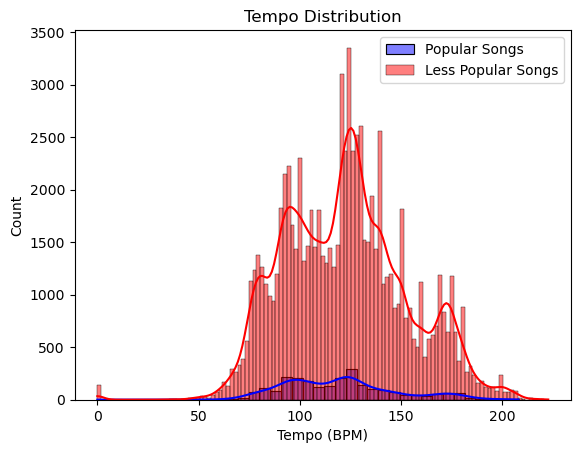

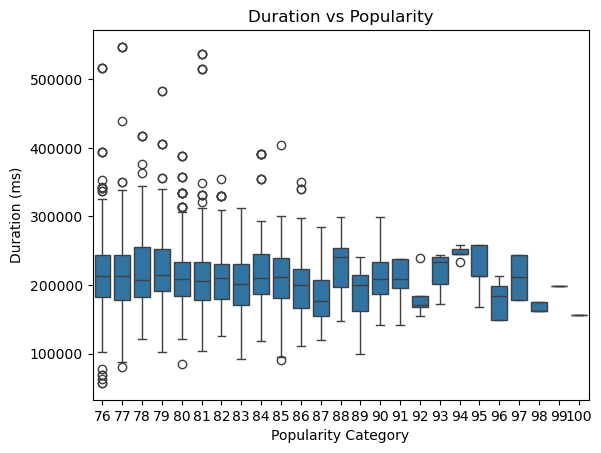

<Figure size 2000x1200 with 0 Axes>

Popular Keys:
 key
1     0.113919
0     0.102320
11    0.093621
7     0.090307
9     0.089064
4     0.086164
5     0.082436
8     0.080365
2     0.077879
6     0.077879
10    0.069594
3     0.036454
Name: proportion, dtype: float64
Popular Modes:
 mode
1    0.58865
0    0.41135
Name: proportion, dtype: float64


In [131]:
# Define popular and less popular songs
popular_songs = df[df['track_popularity'] > 75]
less_popular_songs = df[df['track_popularity'] < 50]

# Analyze tempo
sns.histplot(popular_songs['tempo'], color='blue', label='Popular Songs', kde=True)
sns.histplot(less_popular_songs['tempo'], color='red', label='Less Popular Songs', kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.legend()
plt.show()

# Analyze duration
sns.boxplot(data=popular_songs, x='track_popularity', y='duration_ms')
plt.title('Duration vs Popularity')
plt.xlabel('Popularity Category')
plt.ylabel('Duration (ms)')
plt.figure(figsize=(20, 12))
plt.show()

# Analyze key and mode
popular_keys = popular_songs['key'].value_counts(normalize=True)
popular_modes = popular_songs['mode'].value_counts(normalize=True)
print("Popular Keys:\n", popular_keys)
print("Popular Modes:\n", popular_modes)

#### What is the ideal tempo for successful songs in each genre? Does song duration have a significant impact on popularity?

In [132]:
# Select the top 10 genres by average track_popularity as a list
top10_genres = df.groupby('track_genre')['track_popularity'].mean().sort_values(ascending=False).head(10).index.tolist()
print("Top 10 track_genre by average popularity (as list):")
print(top10_genres)

Top 10 track_genre by average popularity (as list):
['pop-film', 'k-pop', 'chill', 'sad', 'grunge', 'indian', 'anime', 'emo', 'sertanejo', 'pop']


Average Tempo by Genre for Popular Songs (Top 10 Genres):
track_genre
sad         127.572857
emo         126.750000
grunge      124.986963
anime       124.985000
pop-film    124.979600
k-pop       119.819735
pop         117.685238
chill       105.207250
indian       95.858000
Name: tempo, dtype: float64


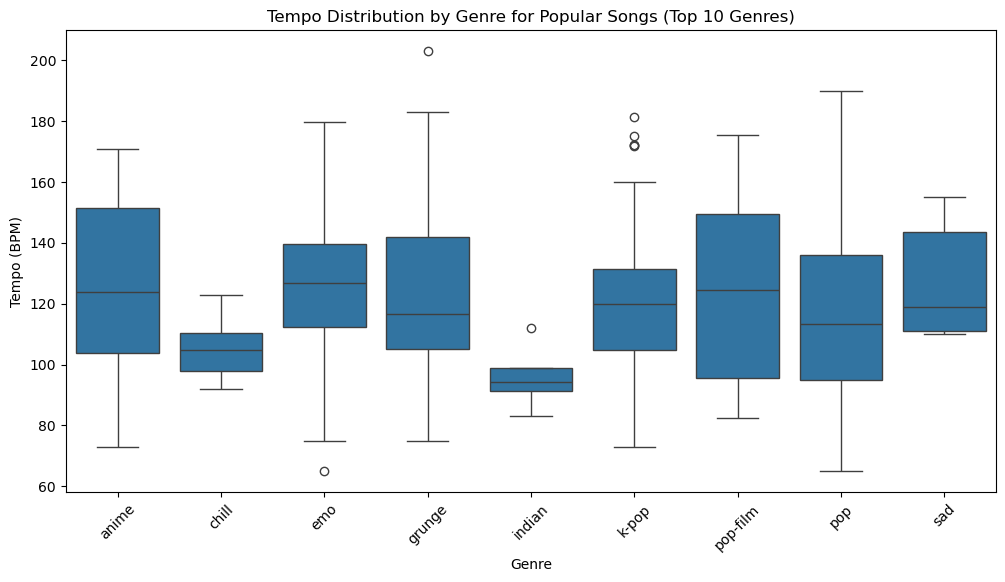

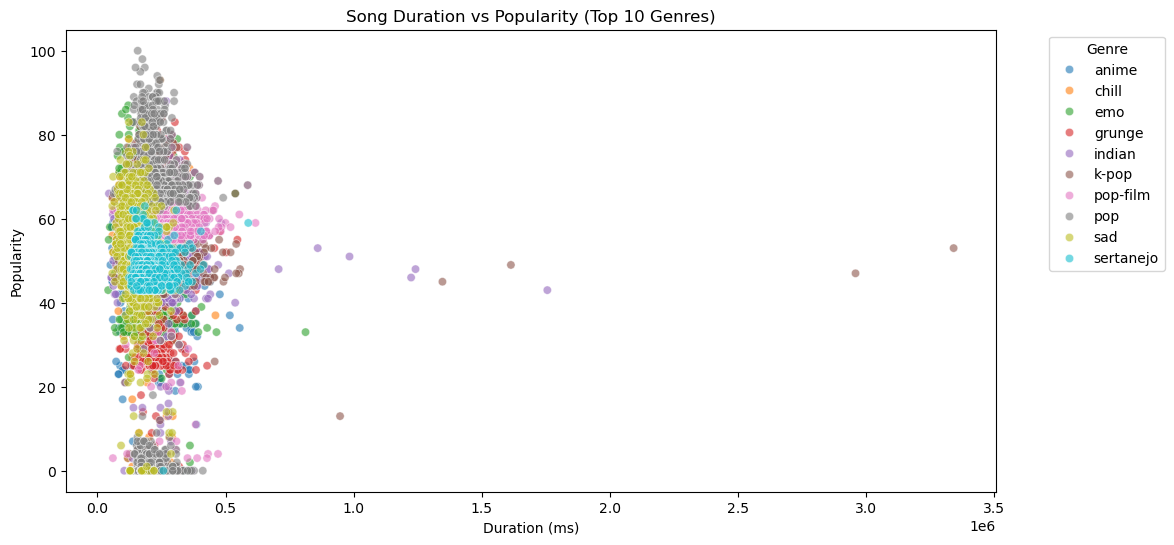

In [133]:
# Group by genre and calculate the average tempo for popular songs (filtered to top 10 genres)
popular_songs_top10 = popular_songs[popular_songs['track_genre'].isin(top10_genres)]
avg_tempo_by_genre = popular_songs_top10.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)
print("Average Tempo by Genre for Popular Songs (Top 10 Genres):")
print(avg_tempo_by_genre)

# Visualize tempo distribution for popular songs by top 10 genres
plt.figure(figsize=(12, 6))
sns.boxplot(data=popular_songs_top10, x='track_genre', y='tempo')
plt.title('Tempo Distribution by Genre for Popular Songs (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between song duration and popularity (filtered to top 10 genres)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df[df['track_genre'].isin(top10_genres)],
    x='duration_ms', y='track_popularity', hue='track_genre', alpha=0.6
)
plt.title('Song Duration vs Popularity (Top 10 Genres)')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Tempo and Duration Analysis Step

## Code Explanation
- Analyzes tempo by genre and how song duration relates to popularity.
- Filters popular songs (popularity > 75).
- Plots: genre tempo (boxplot), duration vs popularity (scatter), and optional subgenre plot.

### Tempo by Genre
- Shows tempo range and median for each genre.
- Reveals genre tempo preferences.

### Duration vs Popularity
- Shows how song length affects popularity.
- Highlights genre-specific duration trends.

## Insights
- Genres have distinct tempo patterns.
- Certain song lengths may boost popularity.
- Outliers and genre differences are visible.

This helps artists pick tempos and durations that fit their genre and audience.


#### How does the time signature (time_signature) affect danceability and popularity?

                danceability  track_popularity
time_signature                                
0                   0.015258         36.975460
1                   0.423024         29.073998
3                   0.437493         29.692442
4                   0.582644         33.672807
5                   0.460160         28.778204


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\4230508177.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
C:\Users\junio\AppData\Local\Temp\ipykernel_47616\4230508177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')


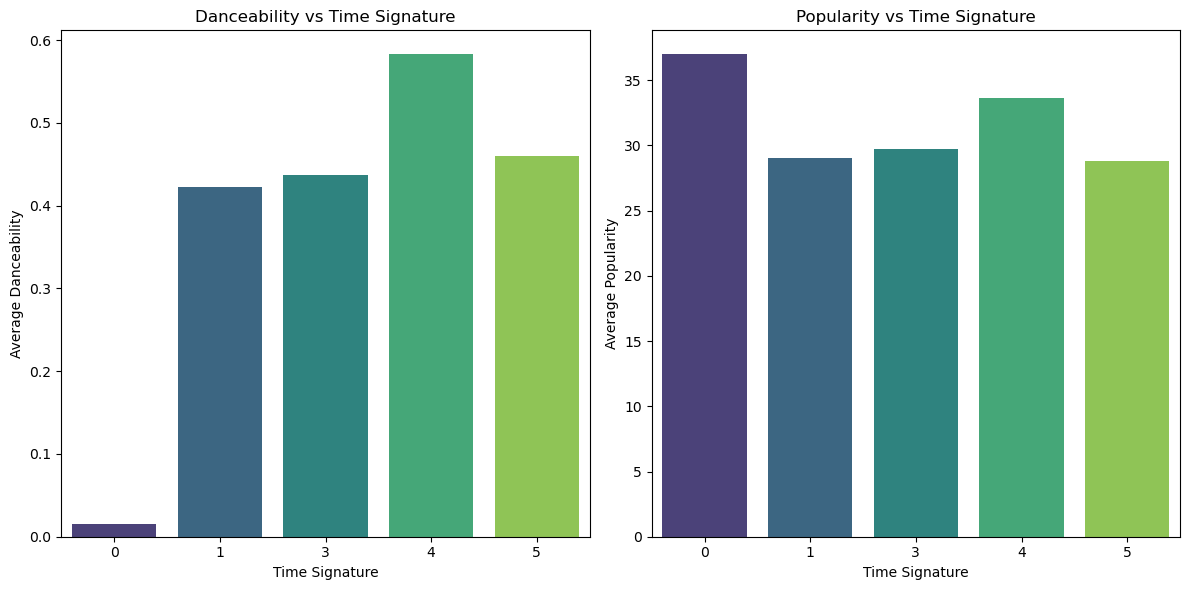

In [134]:
### - How does the time signature (time_signature) affect danceability and popularity?
# Group by time_signature and calculate mean danceability and popularity
time_signature_analysis = df.groupby('time_signature')[['danceability', 'track_popularity']].mean()

# Display the results
print(time_signature_analysis)

# Visualize the relationship
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Danceability vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
ax[0].set_title('Danceability vs Time Signature')
ax[0].set_xlabel('Time Signature')
ax[0].set_ylabel('Average Danceability')

# Popularity vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')
ax[1].set_title('Popularity vs Time Signature')
ax[1].set_xlabel('Time Signature')
ax[1].set_ylabel('Average Popularity')

plt.tight_layout()
plt.show()

# Time Signature Analysis Step

## Code Steps
- Group by time signature, calculate mean danceability and popularity
- Create two bar plots: danceability vs time signature, popularity vs time signature

## Interpretation

**Danceability Plot**
- Shows which time signatures are best for dance music

**Popularity Plot**
- Shows which time signatures are most popular

**Key Insights**
- Reveals if danceable time signatures are also popular
- Some time signatures may work better for certain genres
- Helps artists pick time signatures for more popular songs


#### Which artists have the highest number of popular songs, and what characteristics differentiate them?

Top 10 Artists with the Most Popular Songs:
track_artist
Bad Bunny                48
Red Hot Chili Peppers    31
Arctic Monkeys           30
The Neighbourhood        25
BTS                      20
Guns N' Roses            19
Adele                    19
Feid                     18
Halsey                   18
XXXTENTACION             18
Name: count, dtype: int64


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\1279761852.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity_count.index, y=artist_popularity_count.values, palette='viridis')


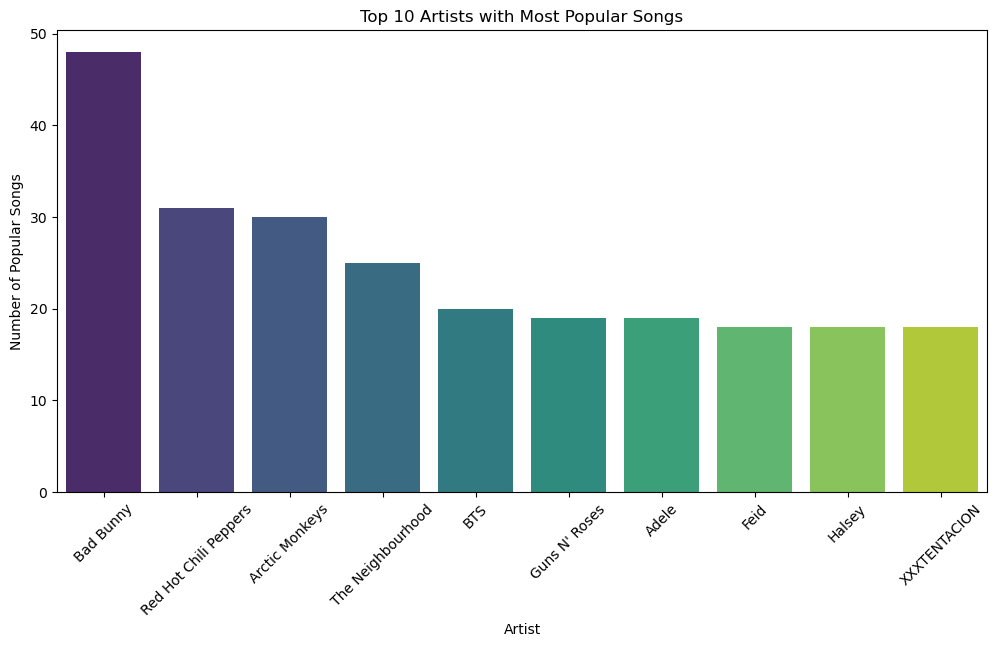


Average Characteristics of Popular Songs by Top Artists:
                         energy  danceability   valence       tempo
track_artist                                                       
Adele                  0.504105      0.509737  0.273795  113.983263
Arctic Monkeys         0.612300      0.551000  0.533200  112.684167
BTS                    0.719100      0.660500  0.597500  108.350950
Bad Bunny              0.646729      0.789583  0.489604  115.858271
Feid                   0.603333      0.759167  0.533333  147.143722
Guns N' Roses          0.824842      0.405053  0.412737  114.889632
Halsey                 0.504444      0.684889  0.492111  133.391667
Red Hot Chili Peppers  0.776355      0.537613  0.571806   98.323129
The Neighbourhood      0.655680      0.527880  0.359600  111.139800
XXXTENTACION           0.512667      0.735833  0.459278  121.712444


In [135]:
### - Which artists have the highest number of popular songs, and what characteristics differentiate them?
# Define a threshold for popularity
popularity_threshold = 75

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Count the number of popular songs per artist
artist_popularity_count = popular_songs['track_artist'].value_counts().head(10)

# Display the top 10 artists with the highest number of popular songs
print("Top 10 Artists with the Most Popular Songs:")
print(artist_popularity_count)
# Visualize the top artists
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_popularity_count.index, y=artist_popularity_count.values, palette='viridis')
plt.title('Top 10 Artists with Most Popular Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45)
plt.show()

# Analyze characteristics of popular songs by these artists
top_artists = artist_popularity_count.index
top_artist_songs = popular_songs[popular_songs['track_artist'].isin(top_artists)]

# Calculate average characteristics for these artists
artist_characteristics = top_artist_songs.groupby('track_artist')[['energy', 'danceability', 'valence', 'tempo']].mean()
print("\nAverage Characteristics of Popular Songs by Top Artists:")
print(artist_characteristics)


# Popular Artists Analysis Step

## Steps

1. **Filter Data**
    - Keep songs with popularity > 75

2. **Artist Ranking**
    - Count popular songs per artist
    - Show top 10 artists

3. **Feature Analysis**
    - Calculate average energy, danceability, valence, and tempo for each top artist

## Interpretation

- **Popular Songs Count**: Shows artists with the most hits
- **Musical Features**: Highlights typical styles of top artists

## Insights

- Common traits among successful artists
- Unique styles of each artist
- Which features drive popularity

This helps identify what makes artists consistently popular.


#### How does an artist's popularity affect the performance of their songs?


Top 10 Artists by Average Song Popularity:
track_artist
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: track_popularity, dtype: float64


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\218766209.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')


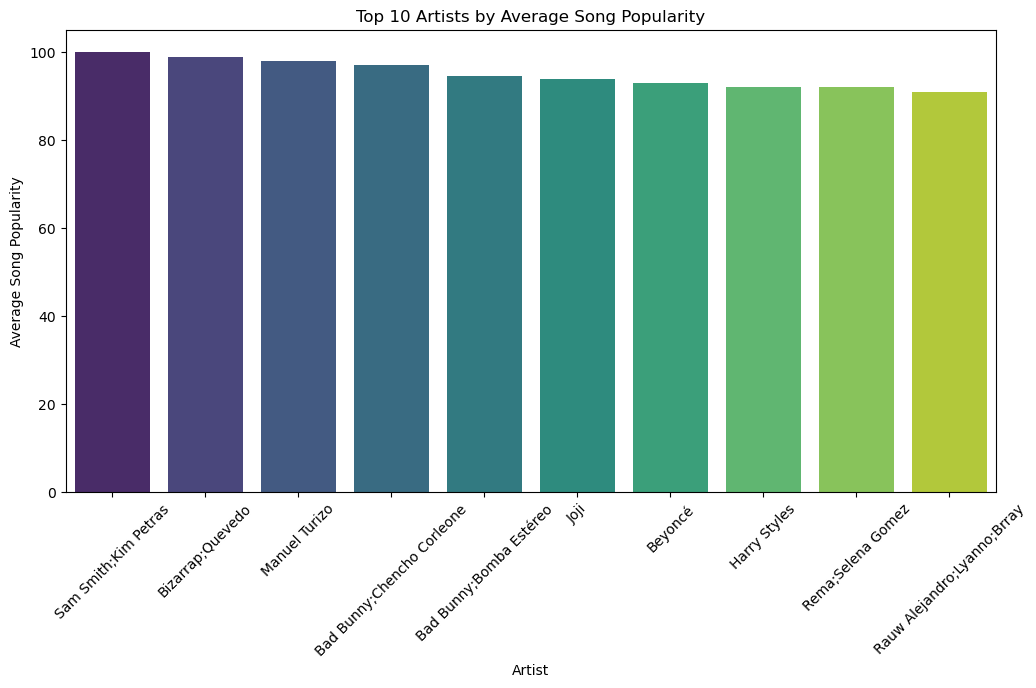

In [136]:
### - How does an artist's popularity affect the performance of their songs?
# Group by artist and calculate the average popularity of their songs
artist_performance = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

# Display the top 10 artists with the highest average song popularity
print("Top 10 Artists by Average Song Popularity:")
print(artist_performance.head(10))

# Visualize the relationship between artist popularity and song performance
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')
plt.title('Top 10 Artists by Average Song Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Song Popularity')
plt.xticks(rotation=45)
plt.show()

# Artist Performance Analysis Step

## Steps

1. **Group by Artist**
    - Calculate average song popularity per artist.
    - Sort to find top 10.

2. **Show Top Artists**
    - List and plot top 10 by average popularity.

3. **Visualize**
    - Bar plot: x = artist, y = average popularity.

## Insights

- Ranks artists by consistent popularity.
- Shows gaps between top performers.
- Reveals which artists maintain high popularity.

## Value

- Identifies successful artist strategies.
- Benchmarks for new artists.
- Informs marketing and promotion.


# Genre Trends Analysis Step

## Code Steps

1. **Prep Data**
    - Filter years > 1900
    - Group by year and genre, count songs

2. **Plot**
    - Line plot: each genre is a line, x = year, y = song count

3. **Format**
    - Add labels, legend, grid

## Insights

- See which genres rise or fall over time
- Spot peak years and declines
- Compare genre popularity by era
- Helps predict trends and guide artist choices


# Artist Career Analysis Step

## Steps

1. **Prep Data**
    - Use data after 1900
    - Find each artist's first and last release year
    - Calculate career length

2. **Popularity**
    - Compute average popularity per artist

3. **Merge**
    - Combine career length and popularity

## Plot Interpretation

- **X-axis**: Career length (years)
- **Y-axis**: Average popularity
- **Alpha**: 0.6 (overlap clarity)

### Insights

- See if longer careers mean higher popularity
- Spot clusters and outliers
- Find patterns for artist success

**Business Value**:  
Shows how career length affects popularity useful for artist planning and benchmarking.


#### How do the musical characteristics that lead to popularity vary across different genres?

Average Musical Characteristics by Genre for Popular Songs (Top 10 Genres Present):


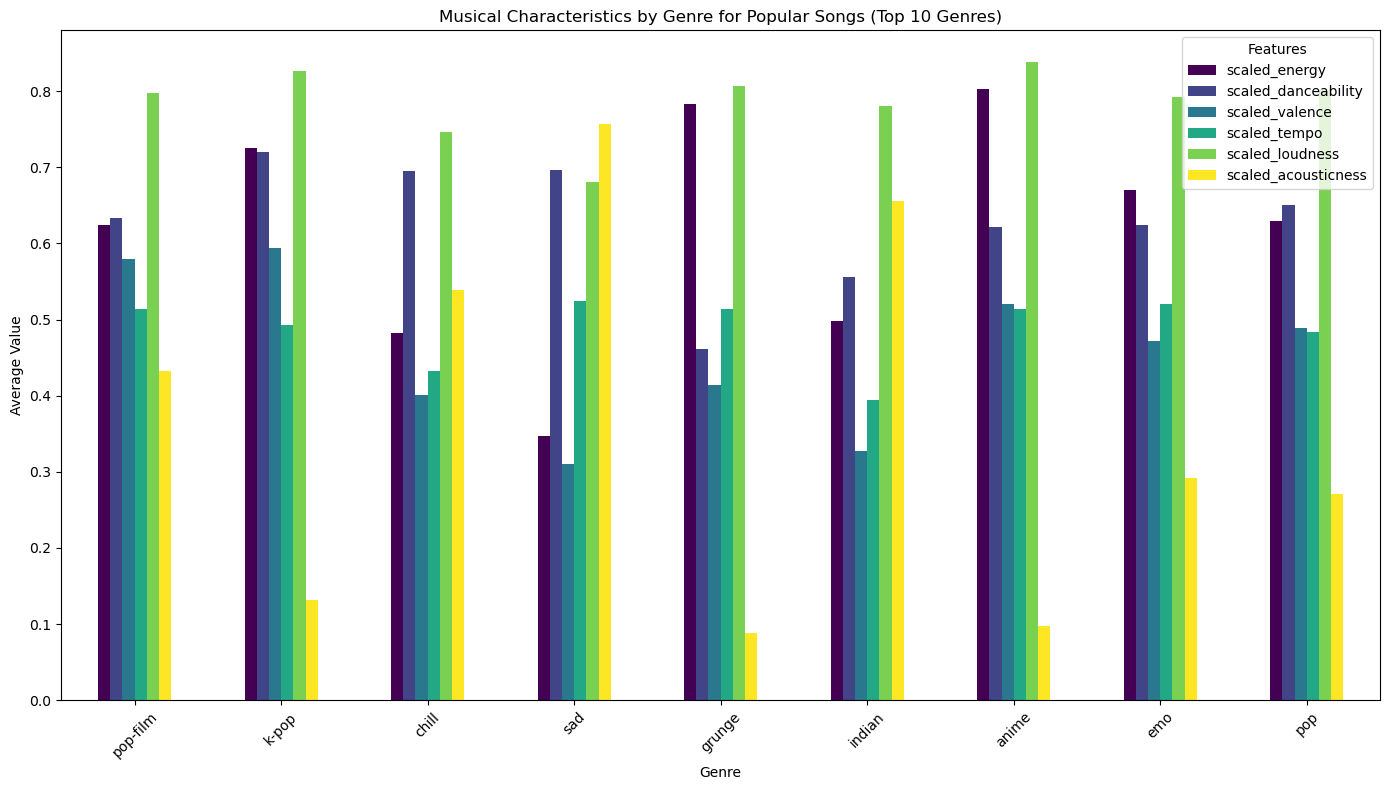

In [139]:
### - How do the musical characteristics that lead to popularity vary across different genres?
# Define a threshold for popularity
popularity_threshold = 75

# Check if the 'track_popularity' column exists
if 'track_popularity' not in df.columns:
	raise ValueError("The 'track_popularity' column does not exist in the DataFrame.")

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Check if there are any popular songs
if popular_songs.empty:
	print(f"No songs found with popularity greater than {popularity_threshold}.")
else:
	# Group by genre and calculate average values for key musical features
	features = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']
	genre_characteristics = popular_songs.groupby('track_genre')[features].mean()

	# Only keep genres that are present in the index
	top10_genres_present = [g for g in top10_genres if g in genre_characteristics.index]
	genre_characteristics_top10 = genre_characteristics.loc[top10_genres_present]

	# Display the results
	print("Average Musical Characteristics by Genre for Popular Songs (Top 10 Genres Present):")
	#print(genre_characteristics_top10)

	# Visualize the characteristics for top 10 genres
	genre_characteristics_top10.plot(kind='bar', figsize=(14, 8), colormap='viridis')
	plt.title('Musical Characteristics by Genre for Popular Songs (Top 10 Genres)')
	plt.xlabel('Genre')
	plt.ylabel('Average Value')
	plt.xticks(rotation=45)
	plt.legend(title='Features')
	plt.tight_layout()
	plt.show()

# Musical Characteristics by Genre

## Steps

1. **Filter**: Keep songs with popularity > 75.
2. **Features**: Use scaled musical features, group by genre, take mean.
3. **Plot**: Bar plot shows feature averages by genre.

## Insights

- **Energy/Danceability**: Show which genres are more energetic or danceable.
- **Valence/Tempo**: Show mood and speed by genre.
- **Loudness/Acousticness**: Show production style by genre.

**Use:**  
Helps artists see what makes songs popular in each genre and guides production choices.


#### How does the subgenre affect the songs popularity?

Top Subgenres by Average Popularity:
track_genre
pop-film     59.283000
k-pop        56.952953
chill        53.651000
sad          52.379000
grunge       49.594000
indian       49.539000
anime        48.772000
emo          48.128000
sertanejo    47.866000
pop          47.576000
Name: track_popularity, dtype: float64


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\3189742761.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')


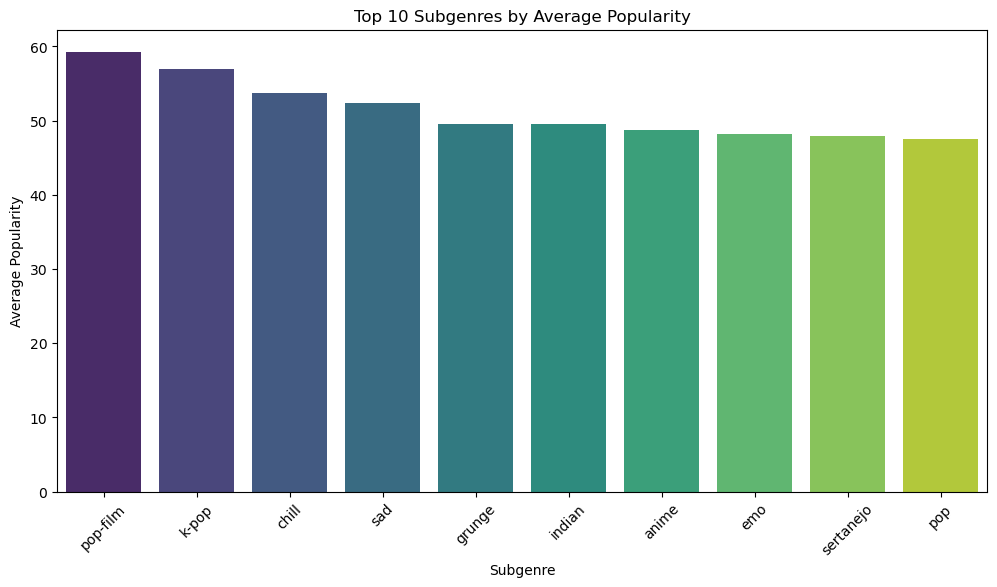

In [140]:
### - How does the subgenre affect the songs popularity?
# Group by subgenre and calculate the average popularity
subgenre_popularity = df.groupby('track_genre')['track_popularity'].mean().sort_values(ascending=False)

# Display the top subgenres by average popularity
print("Top Subgenres by Average Popularity:")
print(subgenre_popularity.head(10))

# Visualize the popularity of subgenres
plt.figure(figsize=(12, 6))
sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')
plt.title('Top 10 Subgenres by Average Popularity')
plt.xlabel('Subgenre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

# Subgenre Popularity Analysis

## Steps

1. **Group & Sort**
    - Group songs by subgenre
    - Calculate average popularity
    - Sort descending

2. **Top 10 Display**
    - Show top 10 subgenres by average popularity

3. **Plot**
    - Bar plot of top 10 subgenres
    - Clear labels and colors

## Interpretation

- Shows which subgenres are most popular
- Reveals popularity gaps and trends
- Helps spot successful and trending styles

## Business Use

- Guides artists to popular subgenres
- Informs marketing and playlist planning
- Highlights where success is most likely


## Question 11
#### How does the consistency and frequency of album releases affect an artist's popularity?

Top 10 Artists by Average Popularity and Album Release Frequency:
                             total_albums  average_popularity
track_artist                                                 
Sam Smith;Kim Petras                    1               100.0
Bizarrap;Quevedo                        1                99.0
Manuel Turizo                           1                98.0
Bad Bunny;Chencho Corleone              1                97.0
Bad Bunny;Bomba Estéreo                 1                94.5
Joji                                    1                94.0
Beyoncé                                 1                93.0
Harry Styles                            3                92.0
Rema;Selena Gomez                       1                92.0
Rauw Alejandro;Lyanno;Brray             1                91.0


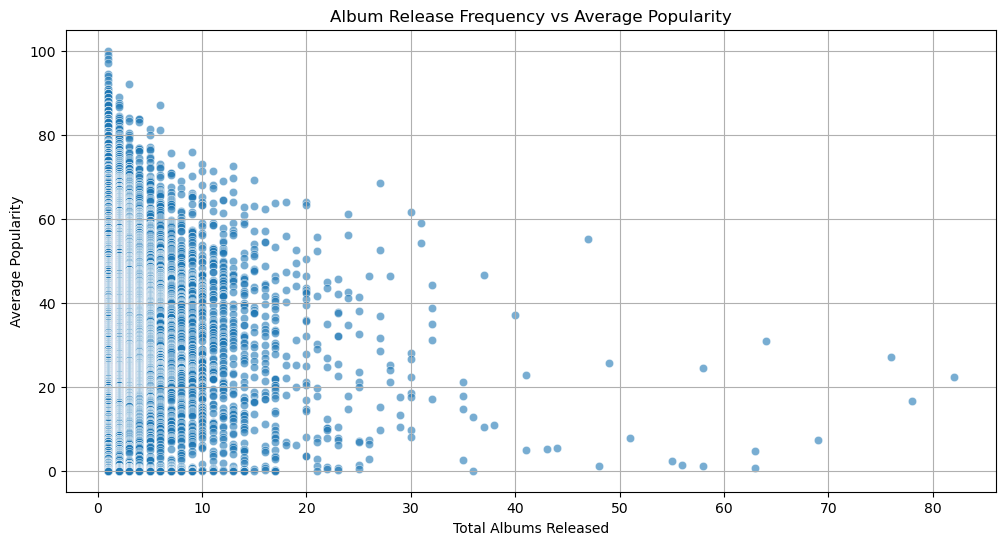

In [141]:
### - How does the consistency and frequency of album releases affect an artist's popularity?
# Group by artist and calculate the number of albums released and their average popularity
artist_album_analysis = df.groupby('track_artist').agg(
    total_albums=('album_name', 'nunique'),
    average_popularity=('track_popularity', 'mean')
).sort_values(by='average_popularity', ascending=False)

# Display the top 10 artists with the highest average popularity and their album release frequency
print("Top 10 Artists by Average Popularity and Album Release Frequency:")
print(artist_album_analysis.head(10))

# Visualize the relationship between album release frequency and average popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=artist_album_analysis, x='total_albums', y='average_popularity', alpha=0.6)
plt.title("Album Release Frequency vs Average Popularity")
plt.xlabel("Total Albums Released")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

# Album Release Analysis

## Code Steps

- **Group by artist**: Count unique albums, calculate mean popularity, sort by popularity.
- **Scatter plot**:  
    - X: Album count  
    - Y: Avg. popularity  
    - Alpha: 0.6 (overlap clarity)

## Plot Insights

- No strong link between album count and popularity.
- Most artists have few albums, popularity varies.
- Some succeed with few releases.

## Takeaways

- Quality matters more than quantity.
- High popularity possible with fewer albums.
- Plan releases for balance, not just more output.

**Tip:** Focus on quality, plan timing, and balance output for best results.


# Release Date Analysis

## Code Breakdown

### 1. Year Analysis
- Filters data post-1950
- Creates boxplot showing popularity distribution by year
- Uses viridis color palette for clarity

### 2. Month Analysis
- Shows popularity distribution across months
- Helps identify seasonal patterns
- Visualizes monthly popularity variations

### 3. Day Analysis
- Displays popularity distribution by day of month
- Reveals daily release patterns
- Identifies optimal release days

## Visualization Interpretation

### Year Trends
- Shows evolution of song popularity over time
- Identifies peak years for music popularity
- Reveals historical trends in music success

### Monthly Patterns
- Highlights seasonal variations in popularity
- Shows best months for releases
- Identifies low-performing months

### Daily Distribution
- Shows impact of release day on popularity
- Identifies optimal days for releases
- Reveals patterns in daily popularity

## Business Insights

### Strategic Timing:
- Choose optimal release months
- Select best days for releases
- Consider historical trends

### Planning:
- Schedule releases during peak periods
- Avoid low-performing timeframes
- Align with seasonal patterns

### Market Understanding:
- Track popularity trends over time
- Understand seasonal variations
- Optimize release scheduling

*This analysis helps artists and labels make informed decisions about release timing to maximize song popularity.*

#### How do musical characteristics vary between different subgenres?

Average Musical Characteristics by Subgenre:
             scaled_energy  scaled_danceability  scaled_valence  scaled_tempo  \
track_genre                                                                     
anime             0.674108             0.545636        0.436646      0.507575   
chill             0.426723             0.674463        0.405798      0.474497   
emo               0.669967             0.608448        0.443352      0.521805   
grunge            0.803290             0.464022        0.402385      0.531488   
indian            0.567121             0.601292        0.465351      0.477224   
k-pop             0.675747             0.657745        0.559536      0.489887   
pop               0.606437             0.640042        0.508767      0.496882   
pop-film          0.604562             0.606240        0.531913      0.481803   
sad               0.462470             0.702922        0.424170      0.489230   
sertanejo         0.710391             0.600657        0.622437 

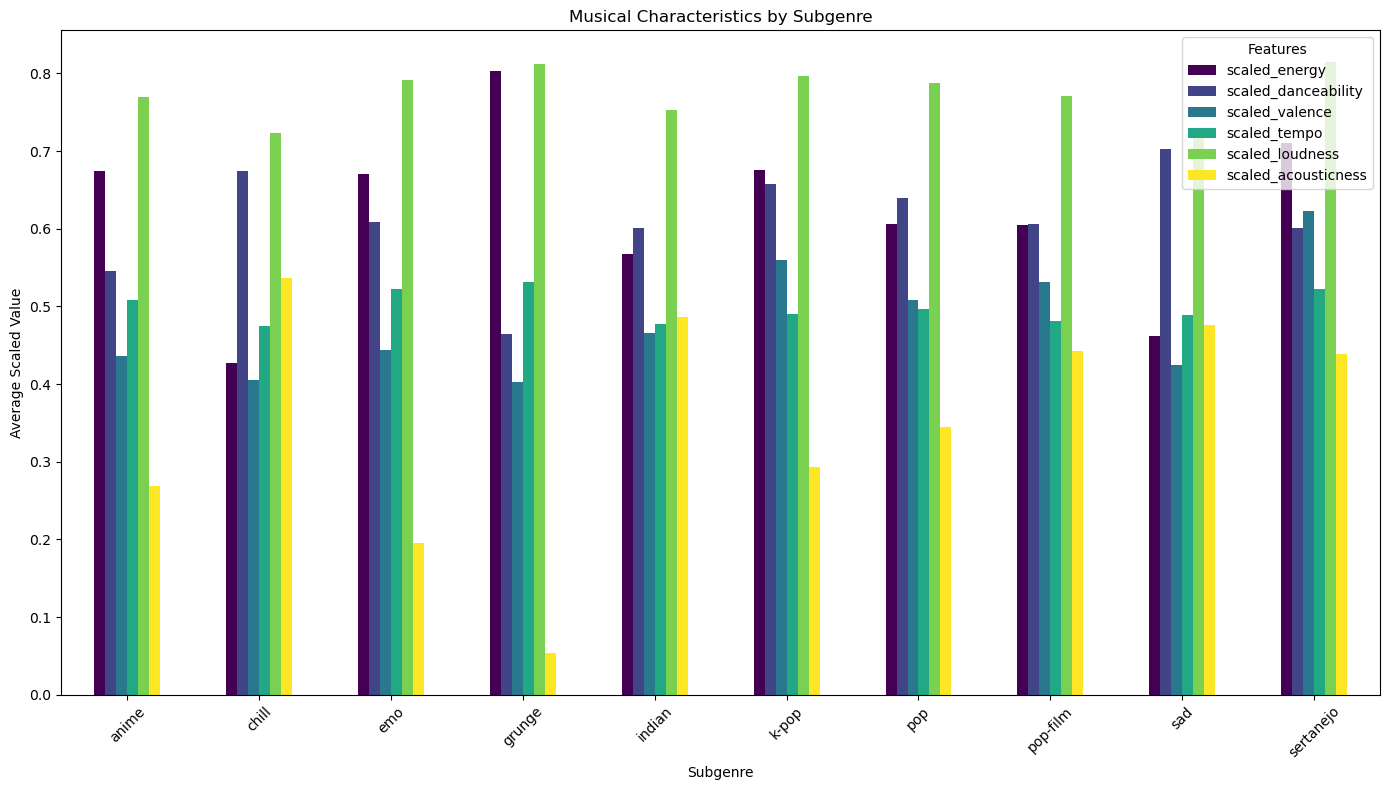

In [142]:
### - How do musical characteristics vary between different subgenres?
# Group by subgenre and calculate average values for selected musical features
characteristics = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']

# Filter top 10 subgenres by average popularity
top10_subgenres = subgenre_popularity.head(10).index
subgenre_characteristics = df[df['track_genre'].isin(top10_subgenres)].groupby('track_genre')[characteristics].mean()

print("Average Musical Characteristics by Subgenre:")
print(subgenre_characteristics)

# Visualize the characteristics by subgenre
subgenre_characteristics.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Musical Characteristics by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Average Scaled Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

# Subgenre Musical Characteristics Analysis

## Code Breakdown

### 1. Data Preparation
- Selects key musical features
- Identifies top 10 most popular subgenres
- Uses scaled versions of features for fair comparison

### 2. Data Aggregation
- Filters for top subgenres
- Calculates mean values of features
- Groups data by subgenre

### 3. Visualization
- Creates bar plot comparing features
- Uses viridis color palette
- Includes clear labels and legend

## Visualization Interpretation

### 1. Feature Comparison
- Shows how musical characteristics vary across subgenres
- Reveals distinct patterns for different styles
- Identifies subgenre-specific traits

### 2. Key Insights
- **Energy & Danceability**: Shows variation in intensity and rhythm
- **Valence & Tempo**: Reveals emotional and speed differences
- **Loudness & Acousticness**: Indicates production style preferences

### 3. Business Applications
- Guides production choices for specific subgenres
- Helps artists target specific musical niches
- Informs arrangement and mixing decisions

## Recommendations
- Match musical characteristics to target subgenre
- Consider subgenre-specific production styles
- Align composition with typical feature patterns
- Use data to inform creative decisions

*This analysis helps artists and producers understand the typical characteristics of successful songs in different subgenres.*

#### Which Genre has the biggest variance in popularity.

Among the top 10 genres, 'pop' has the biggest variance in popularity: 1158.75.


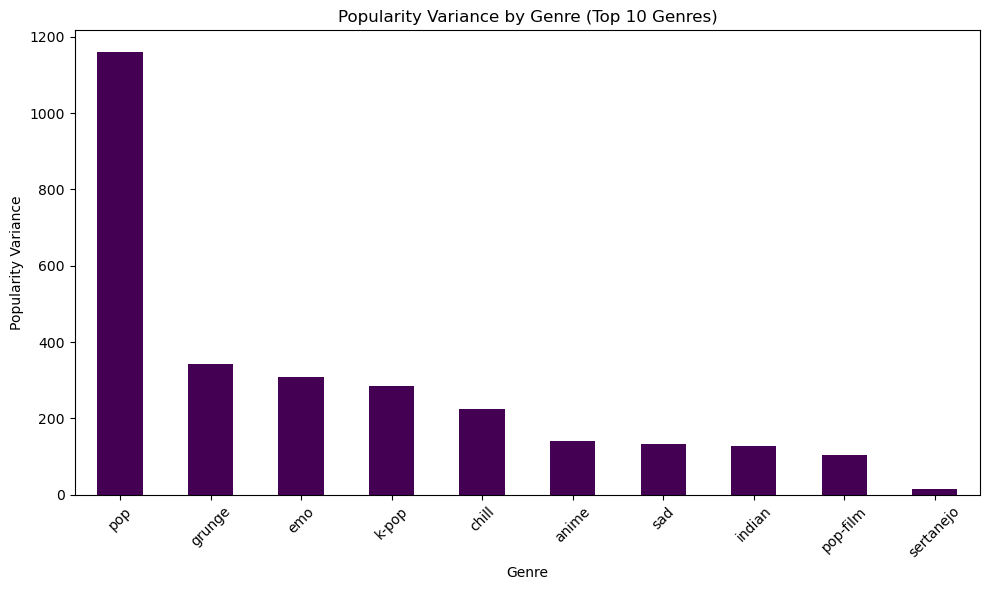

In [144]:
# Filter the genre_variance Series to only include top10_genres
genre_variance_top10 = genre_variance.loc[top10_genres]

# Find the genre with the highest variance among the top 10 genres
max_variance_genre_top10 = genre_variance_top10.idxmax()
max_variance_value_top10 = genre_variance_top10.max()

print(f"Among the top 10 genres, '{max_variance_genre_top10}' has the biggest variance in popularity: {max_variance_value_top10:.2f}.")

genre_variance_top10.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Popularity Variance by Genre (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Popularity Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Genre Popularity Variance Analysis

## Code Breakdown

### 1. Data Analysis
- Calculates variance of popularity for each genre
- Identifies genre with highest variance
- Records maximum variance value

### 2. Visualization
- Creates sorted bar plot of variances
- Uses viridis color scheme
- Sets appropriate figure size and labels

## Interpretation

### 1. Genre Stability
- Higher variance indicates less predictable popularity
- Lower variance suggests more consistent performance
- Shows which genres have more volatile success rates

### 2. Market Insights

**High Variance Genres:**
- More risky but potential for higher success
- Greater spread between hits and misses
- More unpredictable market response

**Low Variance Genres:**
- More stable popularity levels
- More predictable market performance
- Consistent audience engagement

### 3. Business Applications
- **Risk Assessment:** Helps evaluate genre-specific risks
- **Strategy Planning:** Guides genre selection decisions
- **Market Positioning:** Informs marketing approach
- **Investment Decisions:** Aids in resource allocation

## Recommendations
- Consider risk tolerance when choosing genres
- Balance portfolio across variance levels
- Adjust marketing strategies based on variance
- Plan for volatility in high-variance genres

*This analysis helps artists and producers understand the stability and predictability of success across different musical genres.*

## Playlists:
### Playlist_name:
- Which playlists tend to have the most popular songs?
- What characteristics do songs in popular playlists share?

--- 

# Data Preprocessing 

--- 

## Normality Analysis 

,Normality
track_popularity,Not Normal
energy,Not Normal
danceability,Not Normal
valence,Not Normal
tempo,Not Normal
loudness,Not Normal
acousticness,Not Normal
instrumentalness,Not Normal
liveness,Not Normal
speechiness,Not Normal


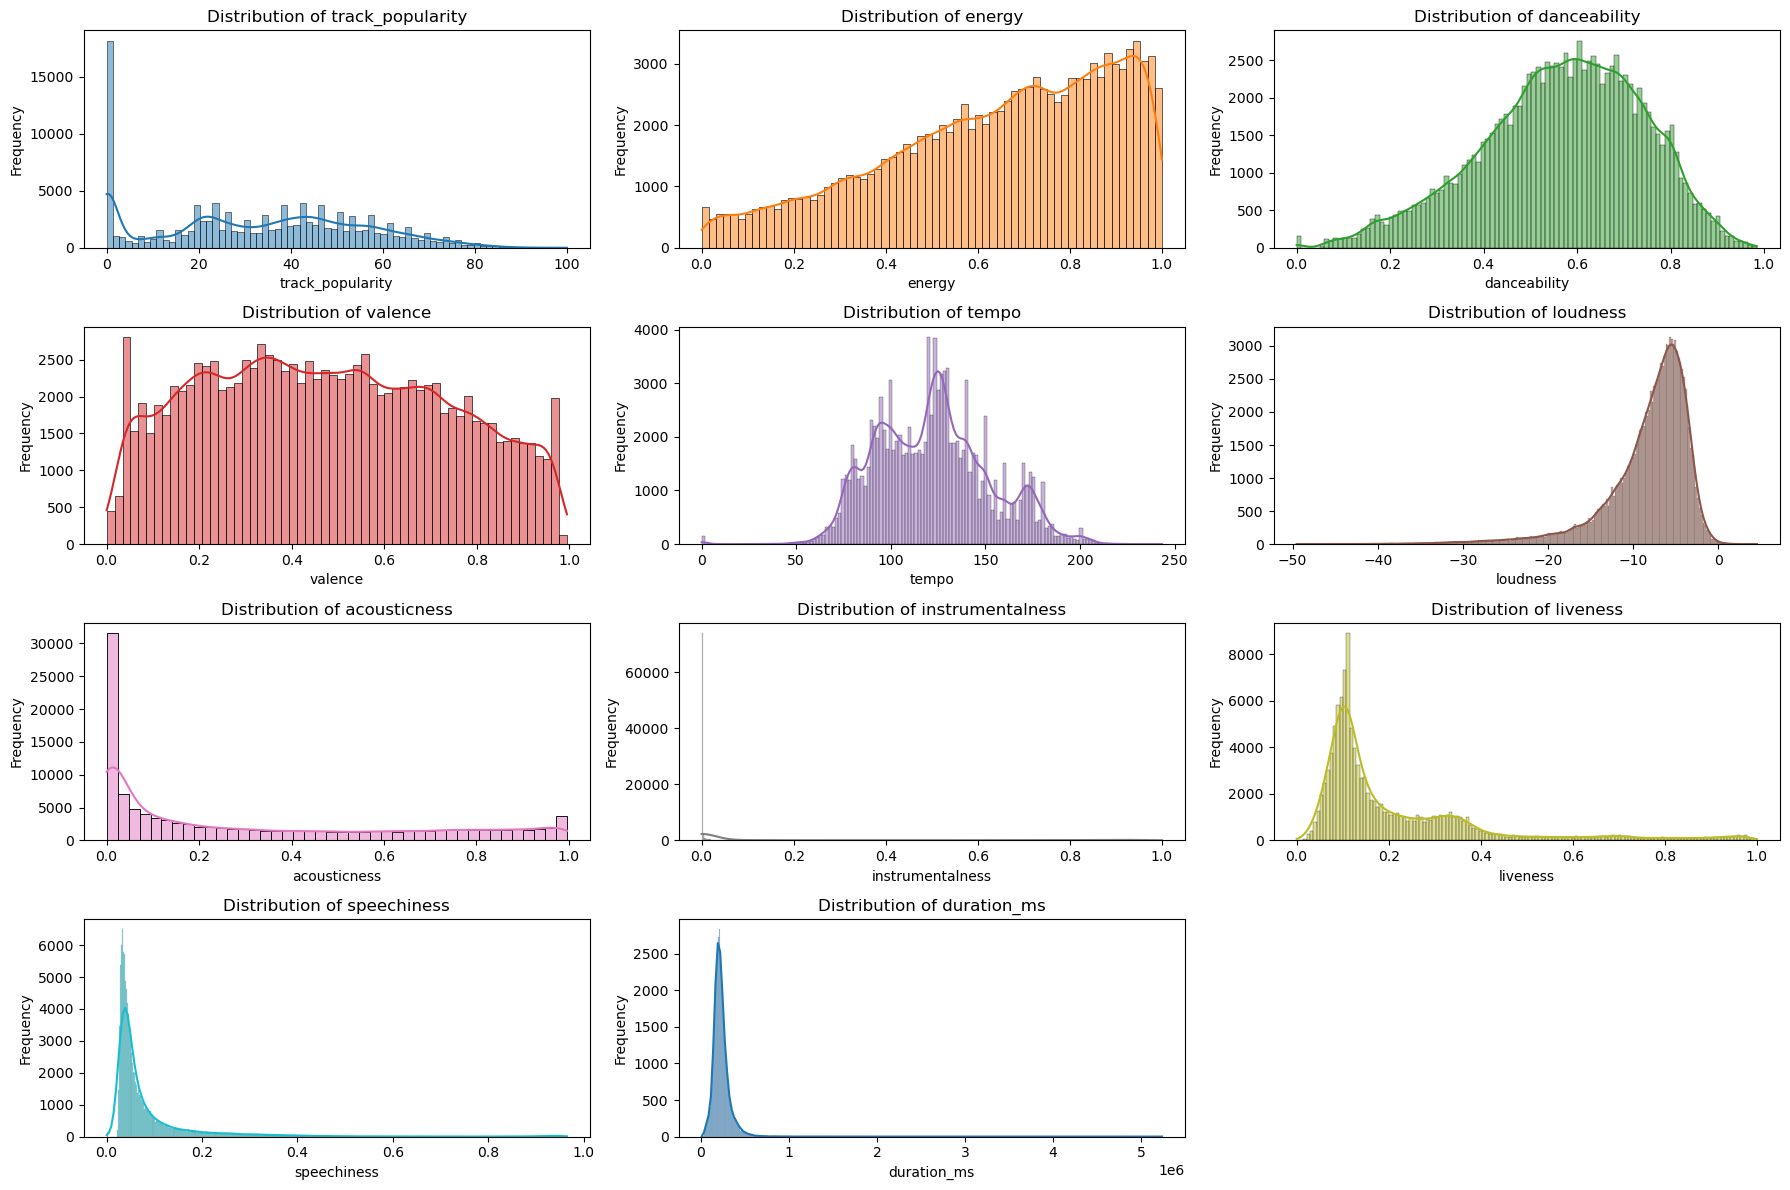

In [87]:
from scipy.stats import normaltest
import seaborn as sns
import itertools
import numpy as np

# Selecting only features relevant for the models used on classification and regression
relevant_columns = ['track_popularity', 'energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'duration_ms']

import matplotlib.pyplot as plt

# Select only numeric columns for normality analysis
numeric_cols = df[relevant_columns].select_dtypes(include=['float64', 'int64']).columns

normality_results = {}

for col in numeric_cols:
    data = df[col].dropna()
    # Pearson’s Test (for n >= 20)
    if len(data) >= 20:
        stat, p = normaltest(data)
        normality_results[col] = {'Normaltest p-value': p}

# Convert the results dictionary to a DataFrame for visualization
normality_df = pd.DataFrame(normality_results).T

# Add a column indicating if the feature is normal (p > 0.05 for Normaltest)
def is_normal(row):
    normaltest_p = row.get('Normaltest p-value', np.nan)
    if not np.isnan(normaltest_p) and normaltest_p > 0.05:
        return 'Normal'
    return 'Not Normal'

normality_df['Normality'] = normality_df.apply(is_normal, axis=1)

# Display normality summary
display(normality_df[['Normality']])

# Visualize distributions for key features in a 3-column grid with different colors

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',]
n_cols = 3
n_plots = len(numeric_cols)
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axes = axes.flatten()

for idx, (col, color) in enumerate(zip(numeric_cols, itertools.cycle(colors))):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], color=color)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


--- 

## Class Imbalance

In [88]:
# Define fixed bins for popularity
popularity_bins = [0, 40, 60, 80, df['track_popularity'].max()]
popularity_labels = ['not_popular', 'almost_popular', 'popular', 'very_popular']

df['popularity_category'] = pd.cut(df['track_popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)
df['popularity_category'].value_counts()

popularity_category
not_popular       67325
almost_popular    33104
popular           12616
very_popular        954
Name: count, dtype: int64

--- 

## Outlier Detection

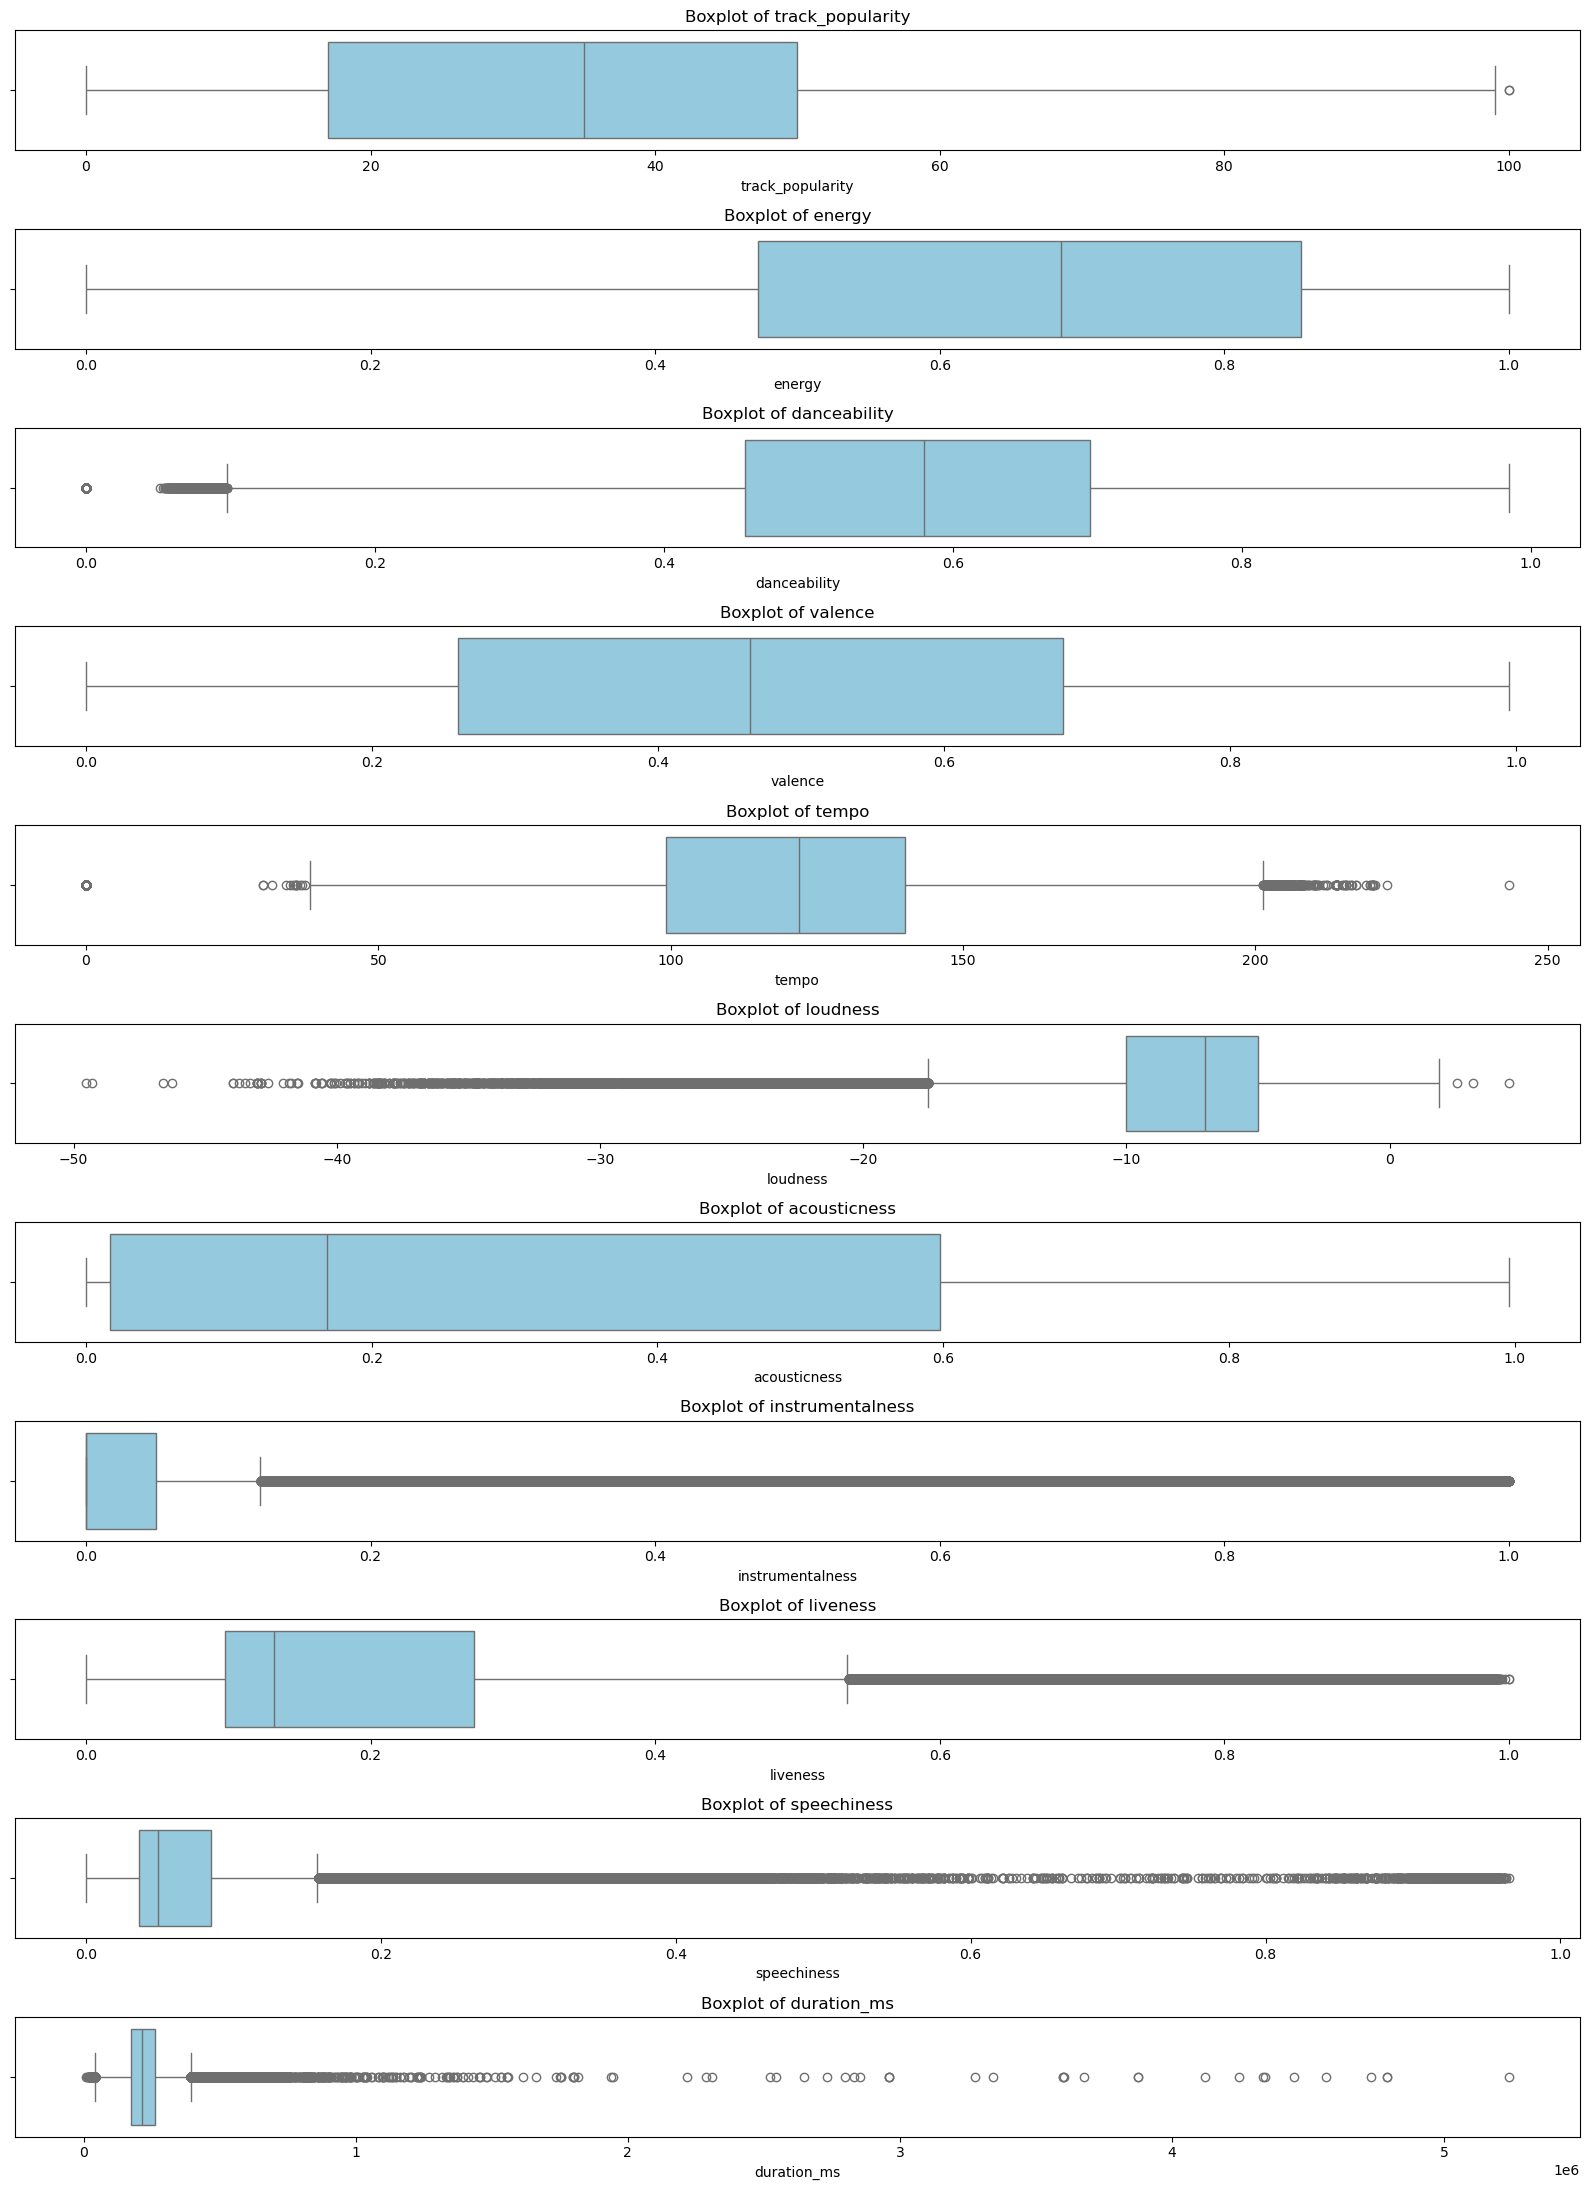

Number of outliers detected per feature (IQR method):
track_popularity: 2
energy: 0
danceability: 620
valence: 0
tempo: 617
loudness: 6173
acousticness: 0
instrumentalness: 25246
liveness: 8642
speechiness: 13211
duration_ms: 5616


In [89]:
# Use only relevant_columns for outlier detection
numeric_cols = df[relevant_columns].select_dtypes(include=['float64', 'int64']).columns

# Visualize boxplots for each relevant numeric feature to detect outliers
plt.figure(figsize=(16, 2 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Identify outliers using the IQR method for each relevant numeric column
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_summary[col] = outliers

# Display the number of outliers per feature
print("Number of outliers detected per feature (IQR method):")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


--- 

## Multicollinearity

Variance Inflation Factor (VIF) for each feature:
            Feature        VIF
0            energy  16.198525
3             tempo  15.439070
1      danceability  12.573209
4          loudness   7.334877
2           valence   6.681165
9       duration_ms   5.553357
5      acousticness   3.606911
7          liveness   2.574441
8       speechiness   1.814638
6  instrumentalness   1.777152


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\2422186632.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')


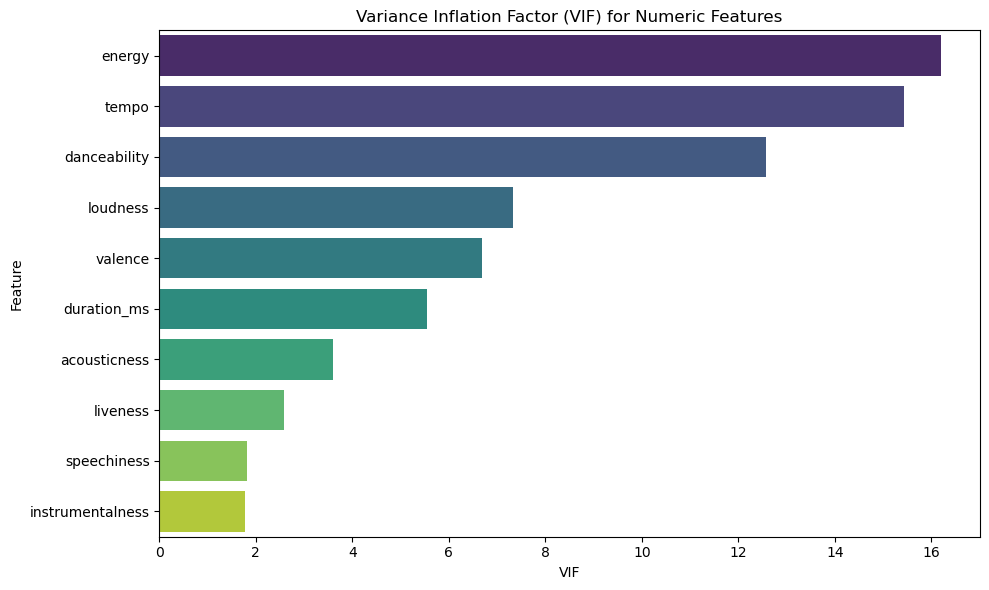

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features for VIF calculation (excluding the target)
numeric_features = [col for col in relevant_columns if col != 'track_popularity' and df[col].dtype in ['float64', 'int64']]
X_vif = df[numeric_features].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values('VIF', ascending=False))

# Visualize VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Numeric Features')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Removed 'energy' with VIF=16.20
Removed 'danceability' with VIF=11.68
Final features with acceptable VIFs:
            Feature       VIF
0           valence  4.201592
1             tempo  8.893278
2          loudness  6.540159
3      acousticness  3.086286
4  instrumentalness  1.721323
5          liveness  2.296469
6       speechiness  1.706286
7       duration_ms  4.872888


C:\Users\junio\AppData\Local\Temp\ipykernel_47616\3236675773.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False), palette='viridis')


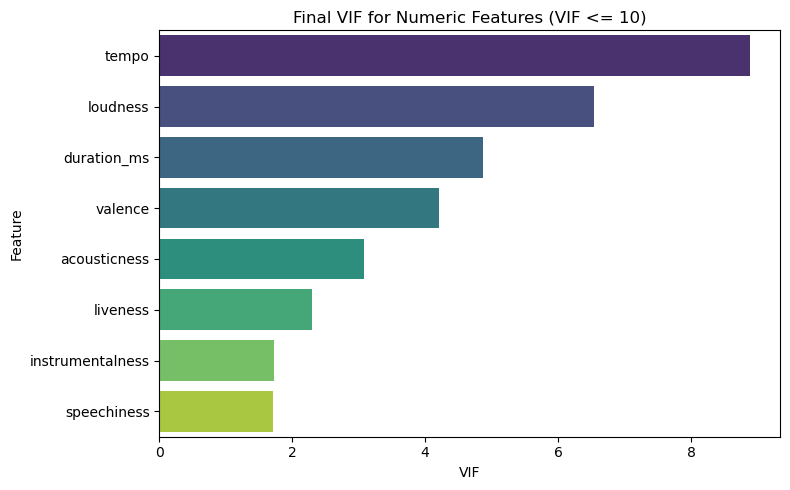

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Iteratively remove features with the highest VIF until all VIFs are below a threshold

# Set VIF threshold
vif_threshold = 10

# Start with the numeric features used previously
features_for_vif = [col for col in relevant_columns if col != 'track_popularity' and df[col].dtype in ['float64', 'int64']]
X_vif_iter = df[features_for_vif].dropna().copy()

vif_history = []

while True:
    vif_df = pd.DataFrame()
    vif_df['Feature'] = X_vif_iter.columns
    vif_df['VIF'] = [variance_inflation_factor(X_vif_iter.values, i) for i in range(X_vif_iter.shape[1])]
    vif_history.append(vif_df.copy())
    max_vif = vif_df['VIF'].max()
    if max_vif <= vif_threshold:
        break
    # Remove the feature with the highest VIF
    drop_feature = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    X_vif_iter = X_vif_iter.drop(columns=[drop_feature])
    print(f"Removed '{drop_feature}' with VIF={max_vif:.2f}")

print("Final features with acceptable VIFs:")
print(vif_df)

# Optionally, plot the final VIFs
plt.figure(figsize=(8, 5))
sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Final VIF for Numeric Features (VIF <= 10)')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

--- 

# Statistical Tests

## Parametric Tests 

In [92]:
from scipy.stats import ttest_ind

# Parametric test: Compare mean popularity between two groups (popular vs. not popular)
# We'll use the popularity_threshold variable to split the data

group1 = df[df['track_popularity'] > popularity_threshold]['track_popularity']
group2 = df[df['track_popularity'] <= popularity_threshold]['track_popularity']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in mean popularity between the two groups.")
else:
    print("Result: No statistically significant difference in mean popularity between the two groups.")

T-statistic: 449.744
P-value: 0.000e+00
Result: Statistically significant difference in mean popularity between the two groups.


In [93]:
from scipy.stats import ttest_ind

# Compare mean 'duration_ms' between popular and less popular songs
popularity_threshold = 75  # already used in previous cells

group_popular = df[df['track_popularity'] > popularity_threshold]['duration_ms']
group_less_popular = df[df['track_popularity'] <= popularity_threshold]['duration_ms']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group_popular, group_less_popular, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in mean duration between popular and less popular songs.")
else:
    print("Result: No statistically significant difference in mean duration between popular and less popular songs.")

T-statistic: -10.231
P-value: 3.786e-24
Result: Statistically significant difference in mean duration between popular and less popular songs.


In [94]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between 'energy' and 'track_popularity'
corr, p_value = pearsonr(df['energy'], df['track_popularity'])

print(f"Pearson correlation coefficient: {corr:}")
print(f"P-value: {p_value:}")

if p_value < 0.05:
    print("Result: Statistically significant correlation between energy and track_popularity.")
else:
    print("Result: No statistically significant correlation between energy and track_popularity.")

Pearson correlation coefficient: 0.0010531126538156719
P-value: 0.7221653128496522
Result: No statistically significant correlation between energy and track_popularity.


---

## Non-Parametric Tests

In [95]:
from scipy.stats import mannwhitneyu

# Define popularity threshold (already used in previous cells)
popularity_threshold = 75

# Split the data into popular and not popular groups
energy_popular = df[df['track_popularity'] > popularity_threshold]['energy']
energy_not_popular = df[df['track_popularity'] <= popularity_threshold]['energy']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(energy_popular, energy_not_popular, alternative='two-sided')

print(f"Mann-Whitney U statistic: {u_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in energy between popular and not popular songs.")
else:
    print("Result: No statistically significant difference in energy between popular and not popular songs.")

Mann-Whitney U statistic: 139762956.500
P-value: 1.496e-03
Result: Statistically significant difference in energy between popular and not popular songs.


---

# Model Selection and Training 


In [96]:
# Get the top 20 genres by average track_popularity
top20_genres = df.groupby('track_genre')['track_popularity'].mean().sort_values(ascending=False).head(20).index

X = df.copy()
#X = X[X['track_genre'].isin(top20_genres)].copy()
X = X.sample(n=20000, random_state=42).copy()
y = y[X.index]
relevant_columns = ['energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'duration_ms']
X = X[relevant_columns]


# Selecting only features relevant for the models used on classification and regression
# relevant_columns = ['energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'duration_ms']
# y = df['track_popularity'].copy()
# X = df[relevant_columns].copy()


print(f"Total rows in dataframe: {len(X)}")
print(X.columns)
X.head()

Total rows in dataframe: 20000
Index(['energy', 'danceability', 'valence', 'tempo', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode',
       'key', 'time_signature', 'duration_ms'],
      dtype='object')


,energy,danceability,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,mode,key,time_signature,duration_ms
113186,0.598,0.369,0.0466,148.014,-6.984,0.00511,0.00000,0.176,0.0304,1,7,4,440247
42819,0.997,0.171,0.0294,122.223,-3.586,0.00521,0.80100,0.420,0.1180,1,7,4,93933
59311,0.803,0.173,0.0887,75.564,-10.071,0.61300,0.00191,0.195,0.1440,0,9,3,213578
90417,0.382,0.419,0.4620,84.185,-13.438,0.32000,0.00000,0.106,0.0322,1,9,4,146706
61000,0.941,0.555,0.8130,92.487,-3.294,0.48400,0.00000,0.266,0.0481,0,9,4,236293


In [97]:
# # Selecting only features relevant for the models used on classification and regression
# relevant_columns = ['energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'duration_ms']
# y = df['track_popularity'].copy()
# X = df[relevant_columns].copy()
# X.head()

In [98]:
print(f"Total rows in dataframe: {len(y)}")
y.head()

Total rows in dataframe: 20000


113186    50
42819     11
59311      0
90417     34
61000     57
Name: track_popularity, dtype: int64

In [99]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the relevant columns
scaled_columns = ['scaled_' + col for col in relevant_columns if col not in [ 'mode', 'key', 'time_signature'  ]] #['release_year', 'mode', 'key', 'time_signature', 'popularity']]
#X[scaled_columns] = scaler.fit_transform(df[[col for col in relevant_columns if col not in ['mode', 'key', 'time_signature']]])
X[scaled_columns] = scaler.fit_transform(X[[col for col in relevant_columns if col not in ['mode', 'key', 'time_signature']]])

# Drop the original unscaled columns and keep only the necessary ones
X = X.drop(columns=[col for col in relevant_columns if col not in ['mode', 'key', 'time_signature']]) #['release_year', 'mode', 'key', 'time_signature']])
# Display the first few rows to verify the scaled columns
X.head()

,mode,key,time_signature,scaled_energy,scaled_danceability,scaled_valence,scaled_tempo,scaled_loudness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_speechiness,scaled_duration_ms
113186,1,7,4,0.597992,0.375000,0.046976,0.608180,0.817279,0.005131,0.00000,0.164554,0.031601,0.091420
42819,1,7,4,0.997000,0.173780,0.029637,0.502206,0.888003,0.005231,0.80100,0.411944,0.122661,0.018075
59311,0,9,3,0.802996,0.175813,0.089415,0.310488,0.753028,0.615462,0.00191,0.183818,0.149688,0.043415
90417,1,9,4,0.381988,0.425813,0.465726,0.345911,0.682950,0.321285,0.00000,0.093582,0.033472,0.029252
61000,0,9,4,0.940999,0.564024,0.819556,0.380023,0.894081,0.485944,0.00000,0.255805,0.050000,0.048225


In [100]:
# Define the target variable and features
y_binary = (y > 75).astype(int)  # Binary classification: popular (1) or not (0)


In [101]:
y_binary.describe()

count    20000.00000
mean         0.01990
std          0.13966
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: track_popularity, dtype: float64

In [102]:
# import necessary libraries
import numpy as np
import pandas as pd # Added for select_features
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor # Added Gradient Boosting
from sklearn.svm import SVC, SVR # Added SVM
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import xgboost as xgb

# Feature Selection and Data Splitting Process

This step implements the initial data preparation for machine learning models. Below are the key components:

## 1. Target Variable Definition
- Renames variables for clarity
- Preserves original data structure

## 2. Classification Target Creation
- Uses median as threshold for balanced classes
- Creates binary target (0/1) for classification
- Maintains continuous target for regression

## 3. Class Distribution Analysis
- Shows threshold value used
- Displays class balance
- Helps verify data split quality

## 4. Feature Selection
- Uses RandomForest for feature importance
- Selects features above threshold (0.01)
- Returns selected features and their importance scores

## Purpose
- **Data Preparation**: Organizes data for both classification and regression tasks
- **Feature Reduction**: Identifies most relevant features for modeling
- **Balance**: Ensures balanced classes for classification
- **Transparency**: Provides clear documentation of data processing steps

## Importance
This step is crucial for:
- Reducing model complexity
- Improving model performance
- Ensuring reliable predictions
- Facilitating model interpretation

# Feature Filtering and Selection Process

## 1. Input Data
- **X_features**: Original feature matrix containing all available predictors
- **selected_features**: List of features identified as important by the RandomForest feature selection

## 2. Feature Filtering
Creates a new dataset (**X_selected**) containing only the features that:
- Showed significant importance (above 0.01 threshold)
- Were selected by the RandomForest algorithm
- Have predictive power for song popularity

## 3. Benefits
- **Dimensionality Reduction**: Reduces number of features to most important ones
- **Model Performance**: Improves model efficiency and reduces overfitting
- **Computational Efficiency**: Reduces training time and memory usage

## Importance
This step is crucial because it:
- Simplifies the model
- Removes irrelevant or redundant features
- Improves model interpretability
- Enhances prediction accuracy

The selected features will be used for both classification and regression models in subsequent steps.

In [103]:
# Apply MinMaxScaler to 'key' and 'time_signature', then drop them from the DataFrame

# Scale 'key', 'time_signature' and mode
X[['scaled_key', 'scaled_time_signature', 'scaled_mode']] = scaler.fit_transform(X[['key', 'time_signature', 'mode']])

# Drop the original 'key', 'time_signature' and 'mode' columns
X = X.drop(columns=['key', 'time_signature', 'mode' ])

In [104]:
# Feature selection using RandomForest
def select_features(X, y, threshold=0.05):
    # Expects X as a pandas DataFrame and y as a pandas Series or numpy array
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    selected_features = importances[importances['importance'] > threshold]['feature'].tolist()
    
    return selected_features, importances

# Filtering the dataset to speed up the running time

In [105]:
# Split data for both classification and regression
# It's assumed 'y' here is the continuous target variable (e.g., df['track_popularity'])
X_features = X.copy() # Renaming to avoid confusion if X is used later with a different meaning
print(X_features.columns)
X_features.head()

Index(['scaled_energy', 'scaled_danceability', 'scaled_valence',
       'scaled_tempo', 'scaled_loudness', 'scaled_acousticness',
       'scaled_instrumentalness', 'scaled_liveness', 'scaled_speechiness',
       'scaled_duration_ms', 'scaled_key', 'scaled_time_signature',
       'scaled_mode'],
      dtype='object')


,scaled_energy,scaled_danceability,scaled_valence,scaled_tempo,scaled_loudness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_speechiness,scaled_duration_ms,scaled_key,scaled_time_signature,scaled_mode
113186,0.597992,0.375000,0.046976,0.608180,0.817279,0.005131,0.00000,0.164554,0.031601,0.091420,0.636364,0.8,1.0
42819,0.997000,0.173780,0.029637,0.502206,0.888003,0.005231,0.80100,0.411944,0.122661,0.018075,0.636364,0.8,1.0
59311,0.802996,0.175813,0.089415,0.310488,0.753028,0.615462,0.00191,0.183818,0.149688,0.043415,0.818182,0.6,0.0
90417,0.381988,0.425813,0.465726,0.345911,0.682950,0.321285,0.00000,0.093582,0.033472,0.029252,0.818182,0.8,1.0
61000,0.940999,0.564024,0.819556,0.380023,0.894081,0.485944,0.00000,0.255805,0.050000,0.048225,0.818182,0.8,0.0


In [106]:
# Use the median as threshold for more balanced classes
threshold = 0.75
y_classification_target = y_binary.copy()
y_regression_target = y.copy()

In [107]:
# Print class distribution
print(f"Classification threshold: {threshold}")
print("Class distribution:")
print(y_classification_target.value_counts(normalize=True))

# Feature selection (using regression target to determine feature importance)
selected_features, importance_df = select_features(X_features, y_regression_target)
print("Selected features:", selected_features)
print("Feature importances:")
print(importance_df)

Classification threshold: 0.75
Class distribution:
track_popularity
0    0.9801
1    0.0199
Name: proportion, dtype: float64
Selected features: ['scaled_acousticness', 'scaled_duration_ms', 'scaled_danceability', 'scaled_tempo', 'scaled_valence', 'scaled_speechiness', 'scaled_loudness', 'scaled_liveness', 'scaled_energy', 'scaled_instrumentalness']
Feature importances:
                    feature  importance
5       scaled_acousticness    0.105324
9        scaled_duration_ms    0.102624
1       scaled_danceability    0.101449
3              scaled_tempo    0.099144
2            scaled_valence    0.098099
8        scaled_speechiness    0.096378
4           scaled_loudness    0.091949
7           scaled_liveness    0.088531
0             scaled_energy    0.084719
6   scaled_instrumentalness    0.071884
10               scaled_key    0.043758
12              scaled_mode    0.009827
11    scaled_time_signature    0.006314


In [108]:
# Prepare data with selected features
X_selected = X_features[selected_features].copy()

# Machine Learning Algorithms for Spotify Song Popularity

## Classification Models

### 1. Random Forest Classifier
- Predicts if a song is popular (yes/no)
- Handles non-linear data, resists overfitting, shows feature importance

### 2. Support Vector Classifier (SVC)
- Binary popularity prediction
- Works well in high dimensions, memory efficient, flexible kernels

### 3. Gradient Boosting Classifier
- Binary popularity prediction
- High accuracy, handles missing data, learns complex patterns

## Regression Models

### 1. XGBoost Regressor
- Predicts exact popularity score
- Fast, accurate, handles missing values, regularized

### 2. Support Vector Regressor (SVR)
- Predicts continuous popularity score
- Good for non-linear data, robust to outliers, works with many features

### 3. Gradient Boosting Regressor
- Predicts popularity score
- Accurate, robust to outliers, handles mixed data types


In [109]:
X_selected.head()

,scaled_acousticness,scaled_duration_ms,scaled_danceability,scaled_tempo,scaled_valence,scaled_speechiness,scaled_loudness,scaled_liveness,scaled_energy,scaled_instrumentalness
113186,0.005131,0.091420,0.375000,0.608180,0.046976,0.031601,0.817279,0.164554,0.597992,0.00000
42819,0.005231,0.018075,0.173780,0.502206,0.029637,0.122661,0.888003,0.411944,0.997000,0.80100
59311,0.615462,0.043415,0.175813,0.310488,0.089415,0.149688,0.753028,0.183818,0.802996,0.00191
90417,0.321285,0.029252,0.425813,0.345911,0.465726,0.033472,0.682950,0.093582,0.381988,0.00000
61000,0.485944,0.048225,0.564024,0.380023,0.819556,0.050000,0.894081,0.255805,0.940999,0.00000


In [110]:
# Split data with different ratios
split_ratios = [0.2, 0.3]
results = {}

for ratio in split_ratios:
    # Split data for classification
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_selected, y_classification_target, test_size=ratio, random_state=42
    )
    # Split data for regression
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        X_selected, y_regression_target, test_size=ratio, random_state=42
    )
    
    # Scale features for classification
    scaler_c = StandardScaler()
    X_train_c_scaled = scaler_c.fit_transform(X_train_c)
    X_test_c_scaled = scaler_c.transform(X_test_c)
    
    # Scale features for regression
    #scaler_r = StandardScaler()
    #X_train_r_scaled = scaler_r.fit_transform(X_train_r)
    X_train_r_scaled = X_train_r.copy()
    #X_test_r_scaled = scaler_r.transform(X_test_r)
    X_test_r_scaled = X_test_r.copy()
    
    results[f'split_{ratio}'] = {}

    # --- Classification Models ---

    # Random Forest Classifier
    rf_params = {
        'n_estimators': [100, 150], # Reduced for potentially faster run, adjust as needed
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    rf_clf = RandomForestClassifier(random_state=42)
    grid_search_rf_clf = GridSearchCV(rf_clf, rf_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_rf_clf.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['RandomForestClassifier'] = {
        'best_params': grid_search_rf_clf.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_rf_clf.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_rf_clf.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }
    
    # Support Vector Classifier (SVC)
    svc_params = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
    svc_clf = SVC(random_state=42, probability=True)
    grid_search_svc = GridSearchCV(svc_clf, svc_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_svc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['SVC'] = {
        'best_params': grid_search_svc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_svc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_svc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }

    # Gradient Boosting Classifier
    gbc_params = {
        'n_estimators': [100, 150], # Reduced for speed
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbc_clf = GradientBoostingClassifier(random_state=42)
    grid_search_gbc = GridSearchCV(gbc_clf, gbc_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_gbc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['GradientBoostingClassifier'] = {
        'best_params': grid_search_gbc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_gbc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_gbc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }

    # --- Regression Models ---

    # XGBoost Regressor
    xgb_params = {
        'max_depth': [7, 15],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100] # Reduced for speed
    }
    xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
    grid_search_xgb_reg = GridSearchCV(xgb_reg, xgb_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_xgb_reg.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['XGBoostRegressor'] = {
        'best_params': grid_search_xgb_reg.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_xgb_reg.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Support Vector Regressor (SVR)
    svr_params = {
        'C': [0.1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'epsilon': [0.1, 0.2]
    }
    svr_reg = SVR()
    grid_search_svr = GridSearchCV(svr_reg, svr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_svr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['SVR'] = {
        'best_params': grid_search_svr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_svr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_svr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_svr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Gradient Boosting Regressor
    gbr_params = {
        'n_estimators': [100, 150], # Reduced for speed
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbr_reg = GradientBoostingRegressor(random_state=42)
    grid_search_gbr = GridSearchCV(gbr_reg, gbr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_gbr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['GradientBoostingRegressor'] = {
        'best_params': grid_search_gbr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_gbr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_gbr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_gbr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

KeyboardInterrupt: 

In [ ]:
'''# Split data with different ratios
split_ratios = [0.2] #[0.2, 0.3]
results = {}

for ratio in split_ratios:
    # Split data for classification
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_selected, y_classification_target, test_size=ratio, random_state=42
    )
    
    # Scale features for classification
    scaler_c = StandardScaler()
    X_train_c_scaled = scaler_c.fit_transform(X_train_c)
    X_test_c_scaled = scaler_c.transform(X_test_c)
    
    results[f'split_{ratio}'] = {}

    # --- Classification Models ---

    # Random Forest Classifier
    rf_params = {
        'n_estimators': [100, 150],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    rf_clf = RandomForestClassifier(random_state=42)
    grid_search_rf_clf = GridSearchCV(rf_clf, rf_params, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search_rf_clf.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['RandomForestClassifier'] = {
        'best_params': grid_search_rf_clf.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_rf_clf.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_rf_clf.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }
    
    # Support Vector Classifier (SVC)
    svc_params = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
    svc_clf = SVC(random_state=42, probability=True)
    grid_search_svc = GridSearchCV(svc_clf, svc_params, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search_svc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['SVC'] = {
        'best_params': grid_search_svc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_svc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_svc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }

    # Gradient Boosting Classifier
    gbc_params = {
        'n_estimators': [100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbc_clf = GradientBoostingClassifier(random_state=42)
    grid_search_gbc = GridSearchCV(gbc_clf, gbc_params, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search_gbc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['GradientBoostingClassifier'] = {
        'best_params': grid_search_gbc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_gbc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_gbc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }'''


"# Split data with different ratios\nsplit_ratios = [0.2] #[0.2, 0.3]\nresults = {}\n\nfor ratio in split_ratios:\n    # Split data for classification\n    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(\n        X_selected, y_classification_target, test_size=ratio, random_state=42\n    )\n    \n    # Scale features for classification\n    scaler_c = StandardScaler()\n    X_train_c_scaled = scaler_c.fit_transform(X_train_c)\n    X_test_c_scaled = scaler_c.transform(X_test_c)\n    \n    results[f'split_{ratio}'] = {}\n\n    # --- Classification Models ---\n\n    # Random Forest Classifier\n    rf_params = {\n        'n_estimators': [100, 150],\n        'max_depth': [10, 20],\n        'min_samples_split': [2, 5]\n    }\n    rf_clf = RandomForestClassifier(random_state=42)\n    grid_search_rf_clf = GridSearchCV(rf_clf, rf_params, cv=3, n_jobs=-1, scoring='accuracy')\n    grid_search_rf_clf.fit(X_train_c_scaled, y_train_c)\n    results[f'split_{ratio}']['RandomForestClassifier

In [ ]:
'''# Split data with different ratios
split_ratios = [0.2, 0.3]
results = {}

for ratio in split_ratios:
    # Split data for regression
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        X_selected, y_regression_target, test_size=ratio, random_state=42
    )
    
    # Scale features for regression
    #scaler_r = StandardScaler()
    #X_train_r_scaled = scaler_r.fit_transform(X_train_r)
    X_train_r_scaled = X_train_r.copy()
    #X_test_r_scaled = scaler_r.transform(X_test_r)
    X_test_r_scaled = X_test_r.copy()
    
    results[f'split_{ratio}'] = {}

    # --- Regression Models ---

    # XGBoost Regressor
    xgb_params = {
        'max_depth': [7, 15],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100] # Reduced for speed
    }
    xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
    grid_search_xgb_reg = GridSearchCV(xgb_reg, xgb_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_xgb_reg.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['XGBoostRegressor'] = {
        'best_params': grid_search_xgb_reg.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_xgb_reg.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Support Vector Regressor (SVR)
    svr_params = {
        'C': [0.1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'epsilon': [0.1, 0.2]
    }
    svr_reg = SVR()
    grid_search_svr = GridSearchCV(svr_reg, svr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_svr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['SVR'] = {
        'best_params': grid_search_svr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_svr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_svr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_svr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Gradient Boosting Regressor
    gbr_params = {
        'n_estimators': [100, 150], # Reduced for speed
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbr_reg = GradientBoostingRegressor(random_state=42)
    grid_search_gbr = GridSearchCV(gbr_reg, gbr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_gbr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['GradientBoostingRegressor'] = {
        'best_params': grid_search_gbr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_gbr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_gbr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_gbr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }'''


"# Split data with different ratios\nsplit_ratios = [0.2, 0.3]\nresults = {}\n\nfor ratio in split_ratios:\n    # Split data for regression\n    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(\n        X_selected, y_regression_target, test_size=ratio, random_state=42\n    )\n    \n    # Scale features for regression\n    #scaler_r = StandardScaler()\n    #X_train_r_scaled = scaler_r.fit_transform(X_train_r)\n    X_train_r_scaled = X_train_r.copy()\n    #X_test_r_scaled = scaler_r.transform(X_test_r)\n    X_test_r_scaled = X_test_r.copy()\n    \n    results[f'split_{ratio}'] = {}\n\n    # --- Regression Models ---\n\n    # XGBoost Regressor\n    xgb_params = {\n        'max_depth': [7, 15],\n        'learning_rate': [0.01, 0.1],\n        'n_estimators': [50, 100] # Reduced for speed\n    }\n    xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')\n    grid_search_xgb_reg = GridSearchCV(xgb_reg, xgb_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed

# Model Performance Evaluation and Visualization

## Key Components

### Nested Loop Structure
- **Outer loop**: Iterates through different split ratios
- **Inner loop**: Iterates through models for each split

### Metric Types
- **Classification**: Displays accuracy
- **Regression**: Shows R² score and RMSE
- **Both**: Shows cross-validation scores

### Formatting
- Organized by split ratio and model type

## Purpose
- Provides clear overview of model performance
- Enables easy comparison between models
- Shows impact of different split ratios
- Displays both training and testing metrics

This visualization helps in selecting the best performing model and understanding the impact of different data split ratios on model performance.

In [ ]:
for split_label, model_metrics_dict in results.items():
    print(f"\n--- Results for {split_label} ---")
    for model_name, metrics in model_metrics_dict.items():
        print(f"\nModel: {model_name}")
        print(f"  Best parameters: {metrics['best_params']}")
        if 'accuracy' in metrics: # Classification model
            print(f"  Test accuracy: {metrics['accuracy']:.4f}")
        if 'r2_score' in metrics: # Regression model
            print(f"  R2 score: {metrics['r2_score']:.4f}")
            print(f"  RMSE: {metrics['rmse']:.4f}")
        if 'cv_scores_mean' in metrics:
            print(f"  Mean CV score: {metrics['cv_scores_mean']:.4f}")


--- Results for split_0.2 ---

Model: RandomForestClassifier
  Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
  Test accuracy: 0.9840
  Mean CV score: 0.9812

Model: SVC
  Best parameters: {'C': 0.1, 'kernel': 'rbf'}
  Test accuracy: 0.9825
  Mean CV score: 0.9795

Model: GradientBoostingClassifier
  Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
  Test accuracy: 0.9810
  Mean CV score: 0.9798

Model: XGBoostRegressor
  Best parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 50}
  R2 score: 0.2219
  RMSE: 19.5298
  Mean CV score: 0.1863

Model: SVR
  Best parameters: {'C': 100, 'epsilon': 0.2, 'kernel': 'rbf'}
  R2 score: 0.0662
  RMSE: 21.3943
  Mean CV score: 0.0487

Model: GradientBoostingRegressor
  Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
  R2 score: 0.1327
  RMSE: 20.6187
  Mean CV score: 0.1230

--- Results for split_0.3 ---

Model: RandomForestClassifier
  Best 

# Model Performance Summary Table

## Key Features
- **Comprehensive Metrics**: Shows all relevant performance measures
- **Clear Organization**: Structured by split ratio and model type
- **Missing Value Handling**: Uses NaN for inapplicable metrics
- **Parameter Display**: Shows best hyperparameters for each model
- **Model Type Distinction**: Separates classification and regression results

## Purpose
- Provides clear overview of all model performances
- Enables easy comparison between different approaches
- Shows impact of different train-test splits
- Facilitates model selection decisions

The table helps in identifying the best performing models and understanding their relative strengths across different evaluation metrics.

In [ ]:
# Prepare data for the table
table_data = []
for split_label, model_metrics_dict in results.items():
    split_ratio_val = split_label.split('_')[-1]
    for model_name, metrics in model_metrics_dict.items():
        row_data = {
            'Split Ratio': split_ratio_val,
            'Model Name': model_name,
            'Best Parameters': str(metrics['best_params']), # Convert dict to string for display
            'Model Type': '',
            'Test Accuracy': np.nan,
            'CV Accuracy': np.nan,
            'Test R2 Score': np.nan,
            'Test RMSE': np.nan,
            'CV R2 Score': np.nan
        }
        if 'accuracy' in metrics: # Classification model
            row_data['Model Type'] = 'Classification'
            row_data['Test Accuracy'] = metrics.get('accuracy')
            row_data['CV Accuracy'] = metrics.get('cv_scores_mean')
        elif 'r2_score' in metrics: # Regression model
            # Based on regression models predict a binary target.
            # R2 and RMSE should be interpreted in this context.
            row_data['Model Type'] = 'Regression'
            row_data['Test R2 Score'] = metrics.get('r2_score')
            row_data['Test RMSE'] = metrics.get('rmse')
            row_data['CV R2 Score'] = metrics.get('cv_scores_mean')
        
        table_data.append(row_data)

results_summary_df = pd.DataFrame(table_data)

# Reorder columns for better readability
column_order = [
    'Split Ratio', 'Model Name', 'Model Type', 
    'Test Accuracy', 'CV Accuracy',
    'Test R2 Score', 'Test RMSE', 'CV R2 Score',
    'Best Parameters'
]
# Ensure all columns in column_order exist in the DataFrame, fill with NaN if not (though they should based on current structure)
for col in column_order:
    if col not in results_summary_df.columns:
        results_summary_df[col] = np.nan
results_summary_df = results_summary_df[column_order]

In [ ]:
print("Machine Learning Model Performance Comparison Table:")
display(results_summary_df)

Machine Learning Model Performance Comparison Table:


,Split Ratio,Model Name,Model Type,Test Accuracy,CV Accuracy,Test R2 Score,Test RMSE,CV R2 Score,Best Parameters
0,0.2,RandomForestClassifier,Classification,0.984000,0.981188,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
1,0.2,SVC,Classification,0.982500,0.979500,NaN,NaN,NaN,"{'C': 0.1, 'kernel': 'rbf'}"
2,0.2,GradientBoostingClassifier,Classification,0.981000,0.979812,NaN,NaN,NaN,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
3,0.2,XGBoostRegressor,Regression,NaN,NaN,0.221898,19.529837,0.186321,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est..."
4,0.2,SVR,Regression,NaN,NaN,0.066244,21.394261,0.048713,"{'C': 100, 'epsilon': 0.2, 'kernel': 'rbf'}"
5,0.2,GradientBoostingRegressor,Regression,NaN,NaN,0.132714,20.618715,0.122981,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
6,0.3,RandomForestClassifier,Classification,0.981833,0.981429,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
7,0.3,SVC,Classification,0.981167,0.979643,NaN,NaN,NaN,"{'C': 0.1, 'kernel': 'rbf'}"
8,0.3,GradientBoostingClassifier,Classification,0.980500,0.979571,NaN,NaN,NaN,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
9,0.3,XGBoostRegressor,Regression,NaN,NaN,0.197438,19.796256,0.163474,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est..."


# Model Performance Visualization

## Key Features
- **Multiple Plots**: Separate visualizations for different metrics
- **Split Comparison**: Shows performance across different train-test splits
- **Consistent Formatting**: Uses same style for all plots
- **Clear Labels**: Proper titles, axis labels, and legends
- **Rotated Labels**: 45-degree rotation for better readability
- **Tight Layout**: Ensures no overlapping elements

## Purpose
This visualization step helps in:
- Comparing model performances visually
- Identifying best performing models
- Understanding the impact of different split ratios
- Assessing model stability through CV scores vs test scores

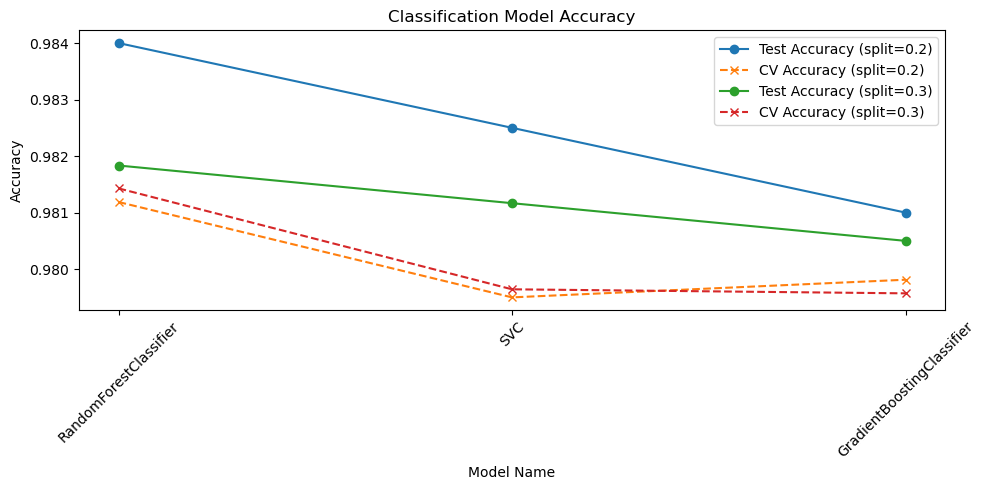

In [ ]:
# Classification models
classification_df = results_summary_df[results_summary_df['Model Type'] == 'Classification']

# Plot classification accuracy
plt.figure(figsize=(10, 5))
for split in classification_df['Split Ratio'].unique():
    subset = classification_df[classification_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test Accuracy'], marker='o', label=f"Test Accuracy (split={split})")
    plt.plot(subset['Model Name'], subset['CV Accuracy'], marker='x', linestyle='--', label=f"CV Accuracy (split={split})")
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis of Classifier Machine Learning Models and Results

## 1. Model Performance Overview
Your classification models (RandomForestClassifier, SVC, GradientBoostingClassifier) all achieve very high test accuracy (~0.98) and cross-validation (CV) accuracy, regardless of the train-test split (0.2 or 0.3). This suggests:
- The models are highly effective at distinguishing between "popular" and "not popular" songs based on your features.
- The results are stable across different splits, indicating robustness.

## 2. Why Should You Care?
- **Business Value:** High accuracy means you can reliably predict which songs are likely to be popular, which is valuable for artists, producers, and streaming platforms.
- **Feature Insights:** The models can help identify which musical features (e.g., danceability, energy, valence) are most predictive of popularity, guiding music production and marketing.
- **Operational Use:** Such models can be integrated into recommendation systems or used for A/B testing new releases.

## 3. Possible Problems and Caveats
- **Class Imbalance:** If your dataset is imbalanced (far more "not popular" than "popular" songs), high accuracy can be misleading. Always check class distribution (you did this in earlier cells).
- **Overfitting:** Extremely high accuracy may indicate overfitting, especially if the model is memorizing rather than generalizing. However, similar CV and test scores suggest this is not a major issue here.
- **Feature Leakage:** Ensure that no information from the target leaks into the features (e.g., using post-release popularity metrics as features).
- **Interpretability:** Tree-based models are more interpretable than SVC, but all models should be checked for feature importance to ensure decisions make sense.
- **Data Quality:** Outliers, missing values, or non-stationary data (e.g., trends over time) can affect model reliability.
- **Threshold Choice:** The threshold for "popular" (e.g., >75) is arbitrary and may affect results. Consider business context and experiment with different thresholds.

## 4. Recommendations to improve
- **Check Confusion Matrix:** Go beyond accuracy look at precision, recall, and F1-score, especially for the "popular" class.
- **Test on New Data:** Validate the model on a truly unseen dataset (e.g., new releases) to ensure real-world performance.
- **Monitor Drift:** Popularity trends may change over time; periodically retrain and validate your models.

---

**Note:**  
We used a sample of 20,000 rows from the full dataset for modeling because running all models on the entire dataset takes a long time and requires more computing power. For full-scale analysis or production deployment, access to more computational resources would be necessary.


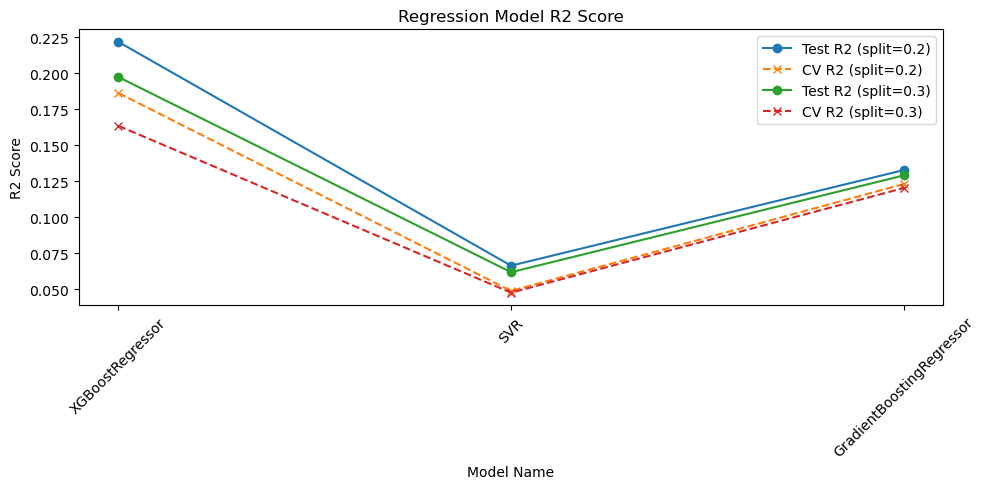

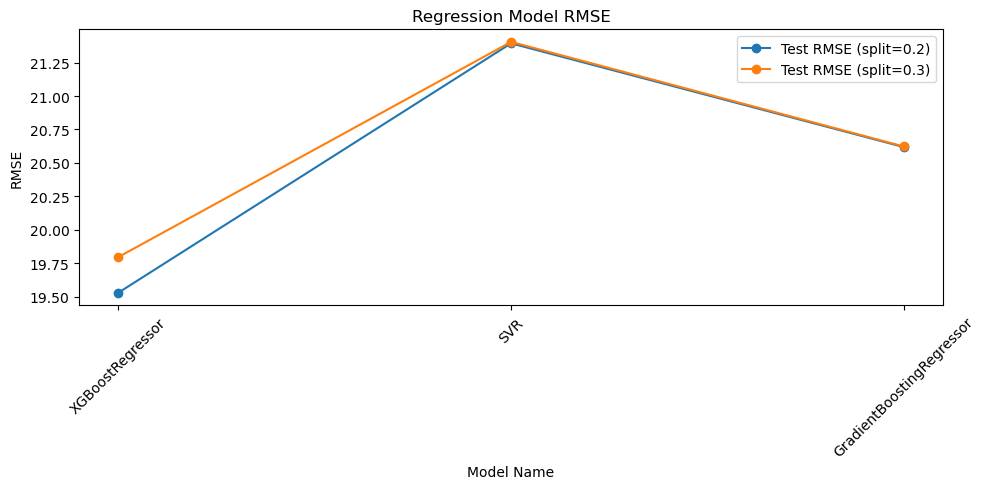

In [ ]:
# Regression models
regression_df = results_summary_df[results_summary_df['Model Type'] == 'Regression']

# Plot regression R2 score
plt.figure(figsize=(10, 5))
for split in regression_df['Split Ratio'].unique():
    subset = regression_df[regression_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test R2 Score'], marker='o', label=f"Test R2 (split={split})")
    plt.plot(subset['Model Name'], subset['CV R2 Score'], marker='x', linestyle='--', label=f"CV R2 (split={split})")
plt.title('Regression Model R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot regression RMSE
plt.figure(figsize=(10, 5))
for split in regression_df['Split Ratio'].unique():
    subset = regression_df[regression_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test RMSE'], marker='o', label=f"Test RMSE (split={split})")
plt.title('Regression Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis of Regression Machine Learning Models and Results

## 1. Model Performance Overview
Your regression models (XGBoostRegressor, SVR, GradientBoostingRegressor) show low R² scores (0.06–0.22) and relatively high RMSE (~19–21) on the test set, regardless of the train-test split (0.2 or 0.3). This means:
- The models are not able to explain much of the variance in song popularity.
- Predictions are not very close to the true popularity values.
- The results are consistent across splits, indicating stability but not strong predictive power.

## 2. Why Should You Care?
- **Business Value:** Regression models can predict the exact popularity score, which is useful for ranking, forecasting, and setting expectations for new releases.
- **Continuous Insight:** Unlike classification, regression gives a nuanced view of how features influence popularity, not just a binary outcome.
- **Feature Impact:** Even with low R², feature importances can highlight which musical attributes most affect popularity.

## 3. Possible Problems and Caveats
- **Low Predictive Power:** Low R² means the model is missing key factors or the problem is inherently noisy (popularity is influenced by many external, non-musical factors).
- **Feature Limitation:** Only musical features are used; marketing, artist fame, playlist placement, and social trends are not included.
- **Data Distribution:** Popularity may be highly skewed or have outliers, making regression harder.
- **Overfitting/Underfitting:** Consistent low scores across splits suggest underfitting (models too simple or features not predictive).
- **Interpretability:** Regression coefficients or feature importances should be checked for business sense.
- **Temporal Drift:** Popularity drivers may change over time; models may not generalize to future data.

## 4. Recommendations to improve
- **Feature Engineering:** Add more features (e.g., artist metrics, release timing, playlist data, social media trends).
- **Target Transformation:** Try predicting log(popularity) or using quantile regression.
- **Model Tuning:** Experiment with more complex models or ensemble approaches.
- **Residual Analysis:** Check where the model fails are there patterns in the errors?
- **Combine with Classification:** Use regression for ranking within the "popular" class identified by classifiers.

---

**Note:**  
We used a sample of 20,000 rows from the full dataset for modeling because running all models on the entire dataset takes a long time and requires more computing power. For full-scale analysis or production deployment, access to more computational resources would be necessary.
